# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [1]:
# if plotnine is not installed in Jupter then use the following command to install it 


Running this project require the following imports 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   

# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

%matplotlib inline

In [2]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = ["blue","red","green","cyan","magenta","yellow","black","grey","darkviolet","darkred","lime"]  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



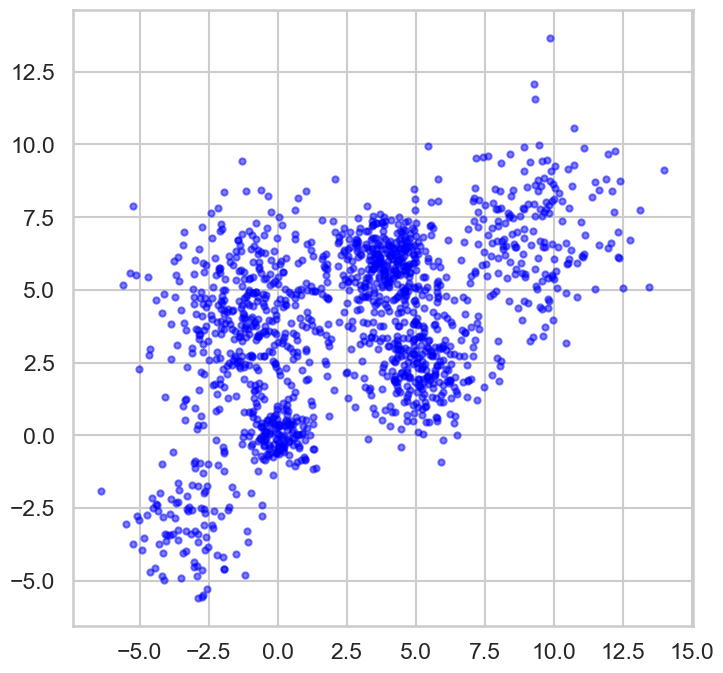

In [3]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

## Visualizing the Multi blob data

<AxesSubplot:>

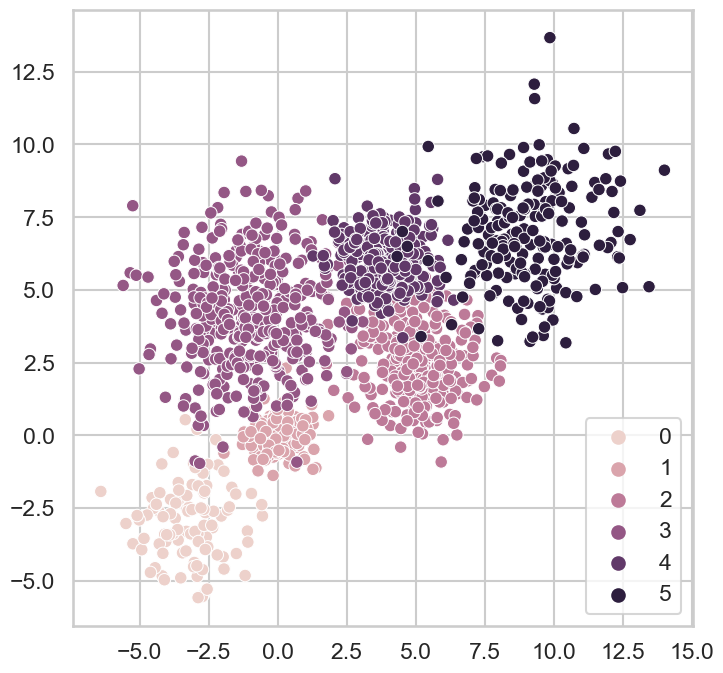

In [4]:
sns.scatterplot(data=Multi_blob_Data, x=Multi_blob_Data[:, 0], y=Multi_blob_Data[:, 1], hue=y)

In [5]:
def plot_clusters(model, data):
    sns.scatterplot(data=data, x=data[:, 0], y=data[:, 1], hue=model.labels_)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

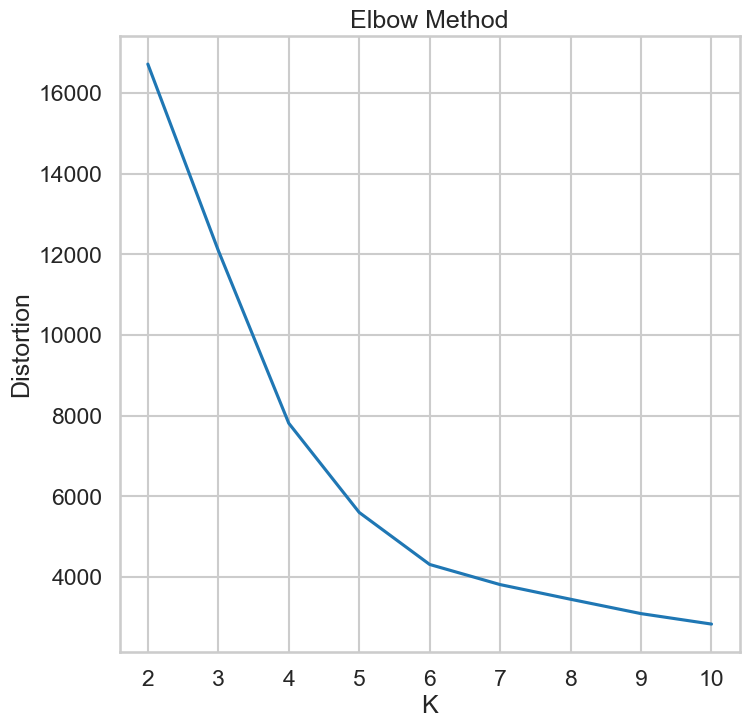

In [6]:
distortions = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(Multi_blob_Data)
    distortions.append(kmeans.inertia_)

plt.plot(range(2, 11), distortions)
plt.title('Elbow Method')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.show()

Since there is a visible elbow at K=6 here is the data visualized with K set to 6:

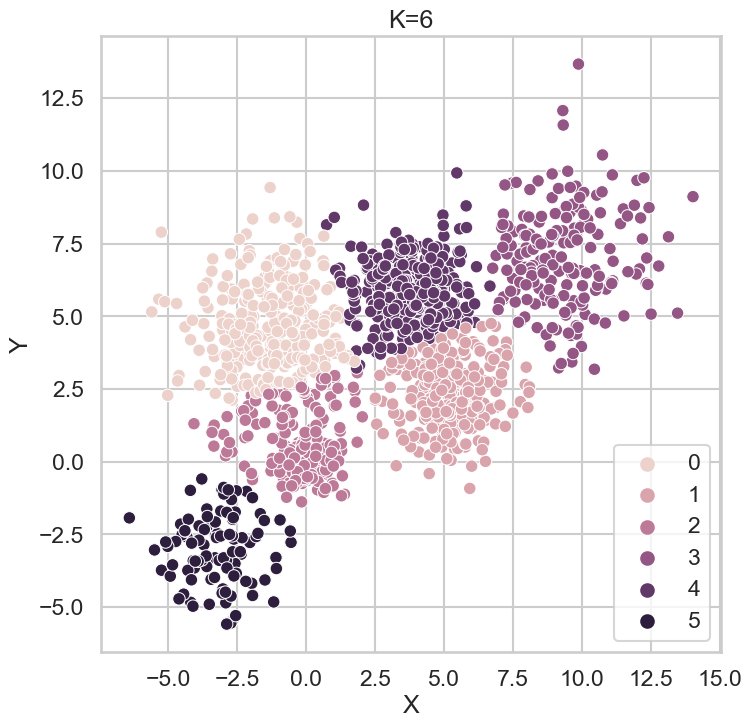

In [7]:
kmeans = KMeans(n_clusters=6).fit(Multi_blob_Data)
labels = kmeans.labels_
plot_clusters(kmeans,Multi_blob_Data)
plt.title('K=6')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


### Comment:
Due to the "blobby" nature of how thedata is shaped, K-means clustering works well.

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

In [8]:
#function to plot dendrogram
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



In [10]:
#loop on affinity and linkage
max_sil_blob_agg=[0,"","",0.0]
for aff in ["euclidean","manhattan","cosine"]:
    for link in ["average","single"]:
        for thresh in range(1,100):
            thr=thresh/10
            hierarchical = AgglomerativeClustering(affinity=aff,linkage=link,distance_threshold=thr,n_clusters=None).fit(Multi_blob_Data)
            if(np.max(hierarchical.labels_)+1==6):
                sil = silhouette_score(Multi_blob_Data,labels=hierarchical.labels_)
                if(sil>max_sil_blob_agg[0]):
                     max_sil_blob_agg=[sil,aff,link,thr]
print(max_sil_blob_agg)

[0.41478815574933364, 'euclidean', 'average', 4.3]


[0 1 2 3 4 5]


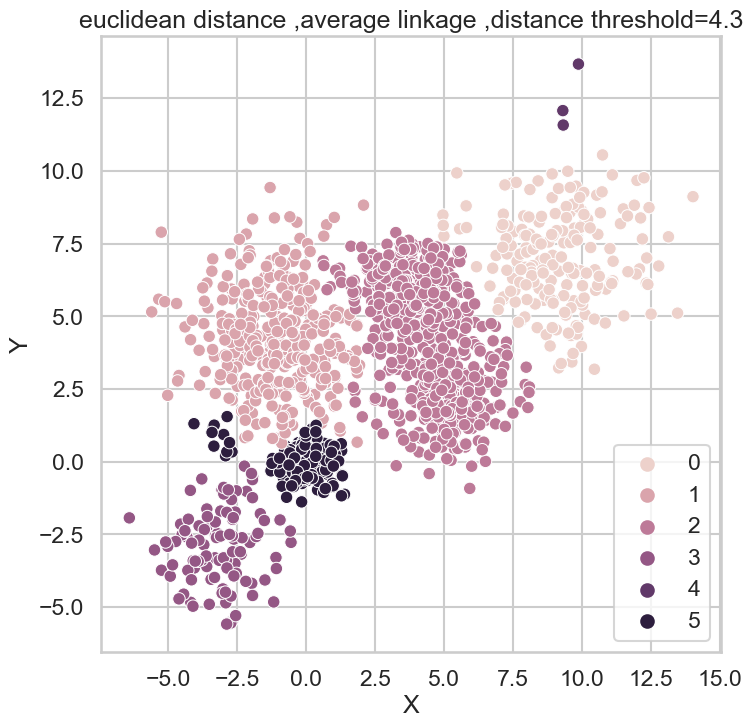

In [14]:
hierarchical = AgglomerativeClustering(affinity=max_sil_blob_agg[1],linkage=max_sil_blob_agg[2],distance_threshold=max_sil_blob_agg[3],n_clusters=None).fit(Multi_blob_Data)
u_labels=np.unique(hierarchical.labels_)
print(u_labels)
plot_clusters(hierarchical,Multi_blob_Data)
plt.title('euclidean distance ,average linkage ,distance threshold=4.3')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

[0 1 2 3 4 5 6 7 8]


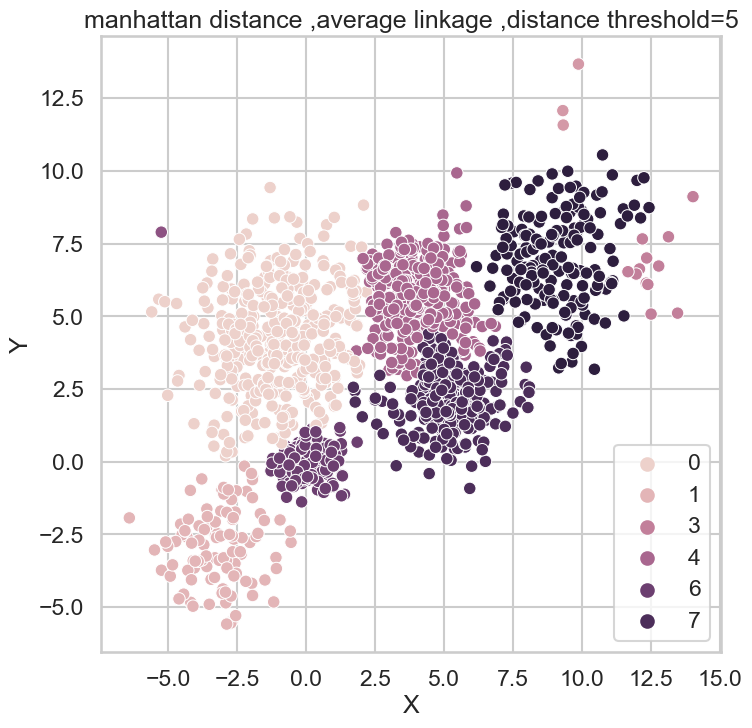

In [16]:
hierarchical = AgglomerativeClustering(affinity="manhattan",linkage="average",distance_threshold=5,n_clusters=None).fit(Multi_blob_Data)
#plot_dendrogram(hierarchical)
u_labels=np.unique(hierarchical.labels_)
print(u_labels)
plot_clusters(hierarchical,Multi_blob_Data)
plt.title('manhattan distance ,average linkage ,distance threshold=5')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

In [17]:
max_sil_blob_db_6 = [0.0,0.0,0]
max_sil_blob_db = [0.0,0.0,0,0]

myx=[]
myy=[]
myz=[]
myk=[]
for i in np.linspace(0.1,3,59): #0.1 to 3 with increments of 0.05    
    for j in range(5,25):
        dbscan = DBSCAN(eps=i,min_samples=j).fit(Multi_blob_Data)
        myK = np.max(dbscan.labels_)+1
        if(1<myK<12):
            sil = silhouette_score(Multi_blob_Data,labels=dbscan.labels_)
            myx.append(i)
            myy.append(j)
            myz.append(sil)
            myk.append(myK)
            if(sil>max_sil_blob_db[0]):
                max_sil_blob_db=[sil,i,j,myK]
        if(myK==6 and sil>max_sil_blob_db_6[0]):
            max_sil_blob_db_6=[sil,i,j]
print('Maximum silhouette score is',max_sil_blob_db[0],'\nEPS = ',max_sil_blob_db[1],'\nMin_samples = ',max_sil_blob_db[2],'\nK = ',max_sil_blob_db[3],'\n')
print('Maximum silhouette score with K=6 is',max_sil_blob_db_6[0],'\nEPS=',max_sil_blob_db_6[1],'\nMin_samples=',max_sil_blob_db_6[2])

myeps=np.array(myx)
mymin=np.array(myy)
mysil=np.array(myz)
myk=np.array(myk)            

Maximum silhouette score is 0.3051951203876005 
EPS =  0.7999999999999999 
Min_samples =  8 
K =  2 

Maximum silhouette score with K=6 is 0.14204756563397533 
EPS= 0.5 
Min_samples= 10


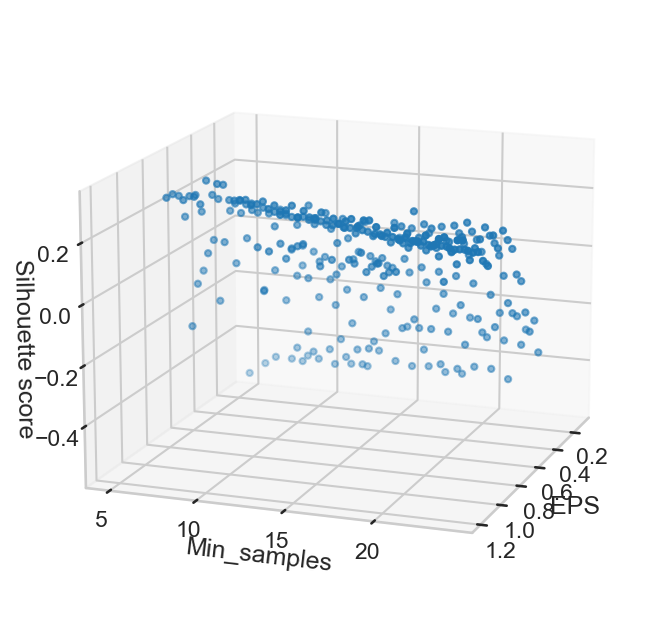

In [36]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# for i in (np.unique(myk)):
#     ax.scatter(myeps[myk==i],mymin[myk==i],mysil[myk==i],c=((i-2)/len(np.unique(myk)),(i-2)/len(np.unique(myk)),1))
ax.scatter(myeps,mymin,mysil)
ax.view_init(elev=15, azim=20)
ax.set_xlabel('EPS')
ax.set_ylabel('Min_samples')
ax.set_zlabel('Silhouette score')
plt.show()


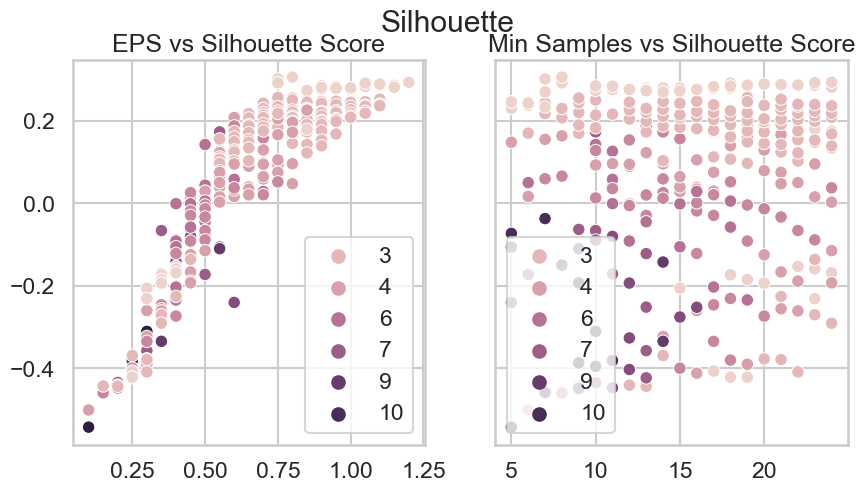

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
fig.suptitle('Silhouette')
#eps vs silhouette
sns.scatterplot(ax=axes[0], x=myeps, y=mysil, hue=myk)
axes[0].set_title('EPS vs Silhouette Score')
#min_samples vs silhouette
sns.scatterplot(ax=axes[1], x=mymin, y=mysil, hue=myk)
axes[1].set_title('Min Samples vs Silhouette Score')
fig.show()


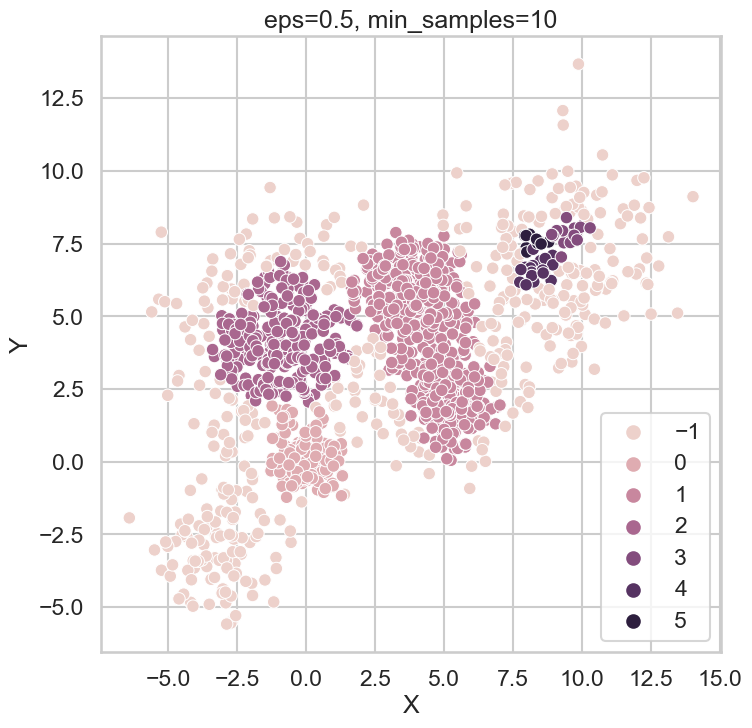

In [20]:
dbscan = DBSCAN(eps=max_sil_blob_db_6[1],min_samples=max_sil_blob_db_6[2]).fit(Multi_blob_Data)

plot_clusters(dbscan,Multi_blob_Data)
plt.title(('eps='+str(max_sil_blob_db_6[1])+', min_samples='+str(max_sil_blob_db_6[2])))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

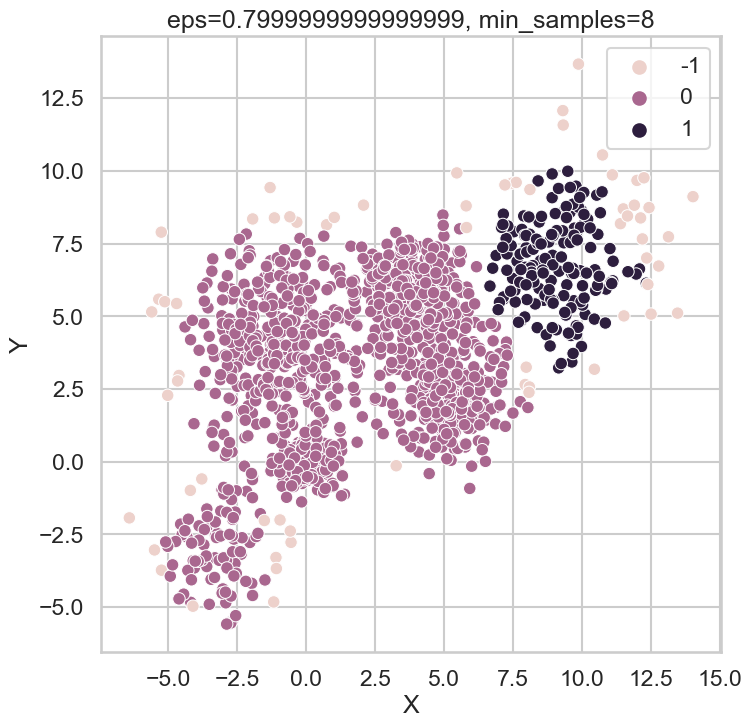

In [21]:
dbscan = DBSCAN(eps=max_sil_blob_db[1],min_samples=max_sil_blob_db[2]).fit(Multi_blob_Data)

plot_clusters(dbscan,Multi_blob_Data)
plt.title(('eps='+str(max_sil_blob_db[1])+', min_samples='+str(max_sil_blob_db[2])))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

In [28]:
# function to plot 2d contour
from scipy.stats import multivariate_normal
def gmm_plot(model,data):
    means = model.means_
    covs = model.covariances_
    weights = model.weights_

    x, y = np.meshgrid(np.linspace(np.min(data[:,0]), np.max(data[:,0]), 200), np.linspace(np.min(data[:,1]), np.max(data[:,1]), 200))

    z = np.zeros_like(x)
    
    # Plot individual components
    fig, axs = plt.subplots(ncols=2, figsize=(12, 5))

    for i in range(model.n_components):
        rv = multivariate_normal(model.means_[i], model.covariances_[i])
        z_i = rv.pdf(np.dstack((x, y)))
        z += model.weights_[i] * z_i
        axs[0].contour(x, y, z_i, colors=[f'C{i}'])
    axs[0].set_title('Individual Components')

    # Plot total
    axs[1].contour(x, y, z)
    axs[1].set_title('Total')

    plt.suptitle('Gaussian Mixture Model')
    plt.show()

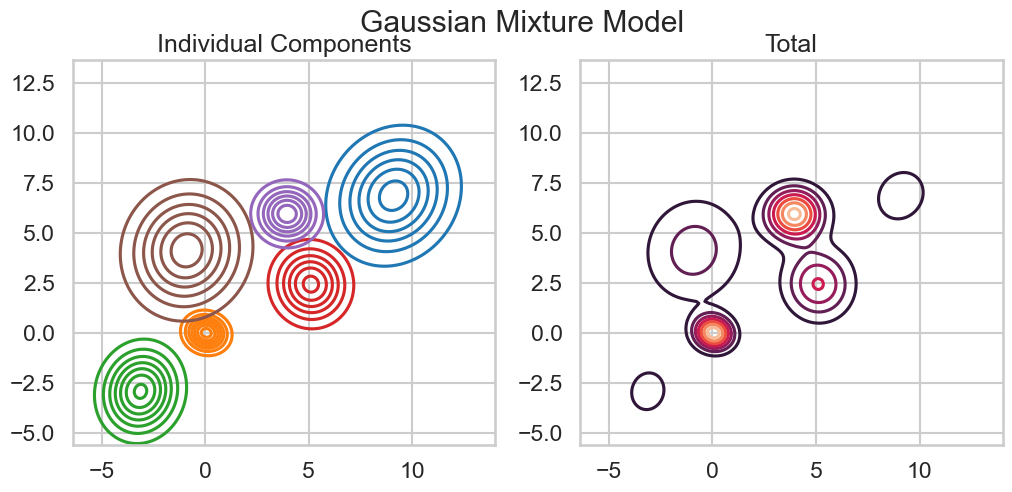

In [33]:
gmm = GaussianMixture(covariance_type="full",n_components=6).fit(Multi_blob_Data)
gmm_plot(gmm,Multi_blob_Data)


## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


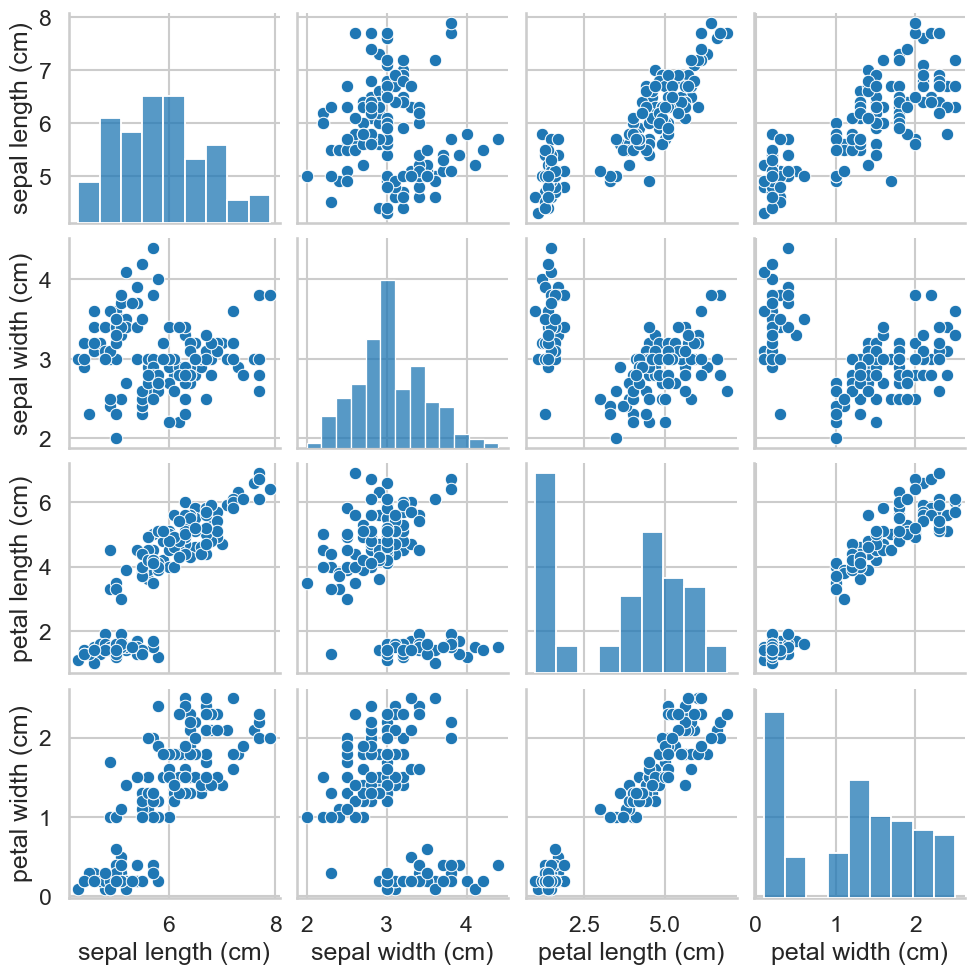

In [34]:
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()

# Convert the iris dataset to a pandas DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Create a StandardScaler object
scaler = prep.StandardScaler()

# Fit and transform the iris data using the StandardScaler object
iris_scaled = scaler.fit_transform(iris_df)

# Convert the scaled data to a pandas DataFrame
iris_scaled_df = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

sns.pairplot(data=iris_df)

# iris_data = load_iris()
# iris_data.target[[10, 25, 50]]
# #array([0, 0, 1])
# list(iris_data.target_names)
# ['setosa', 'versicolor', 'virginica']


* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

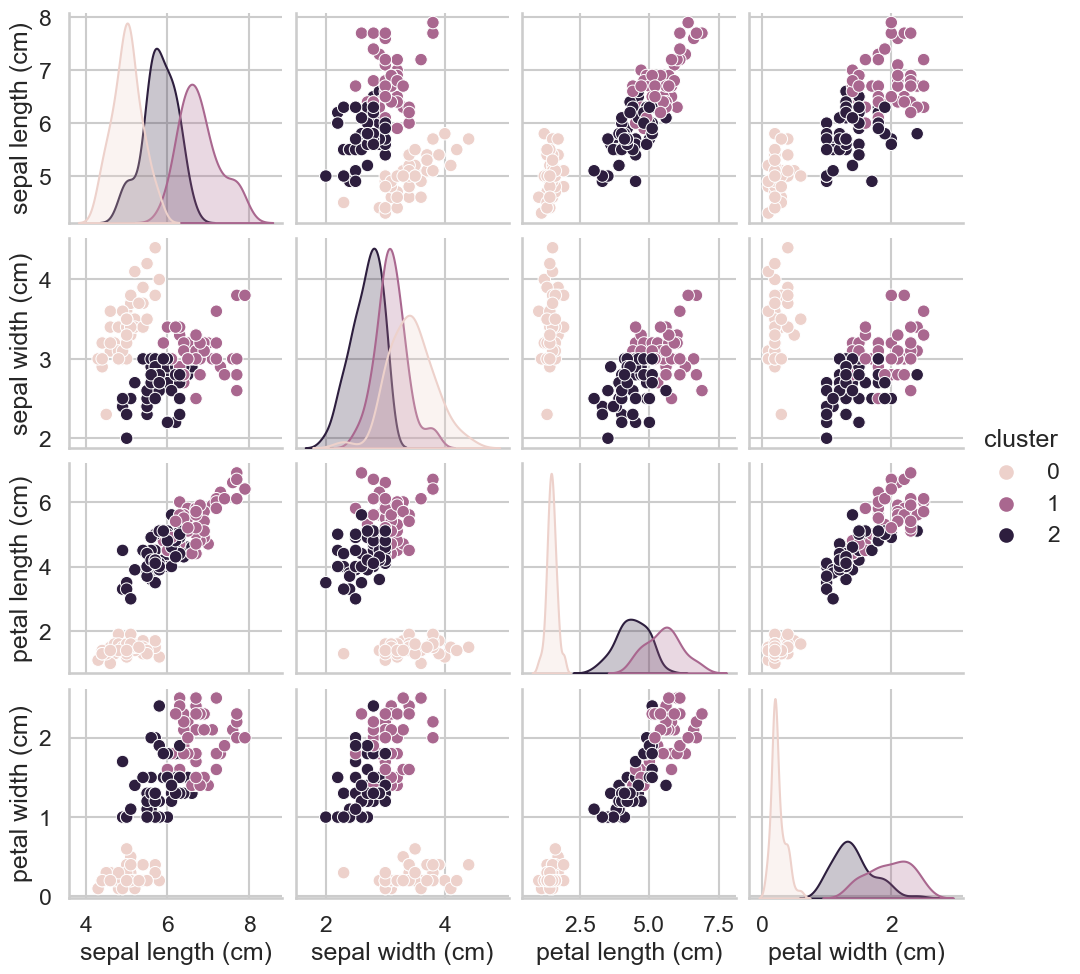

In [35]:

# Perform k-means clustering with k=3
kmeans = KMeans(n_clusters=3)
kmeans.fit(iris_scaled_df)

# Add the cluster labels to the DataFrame
iris_df['cluster'] = kmeans.labels_

# Visualize the dataset using pairplot with cluster labels
sns.pairplot(data=iris_df, hue='cluster')

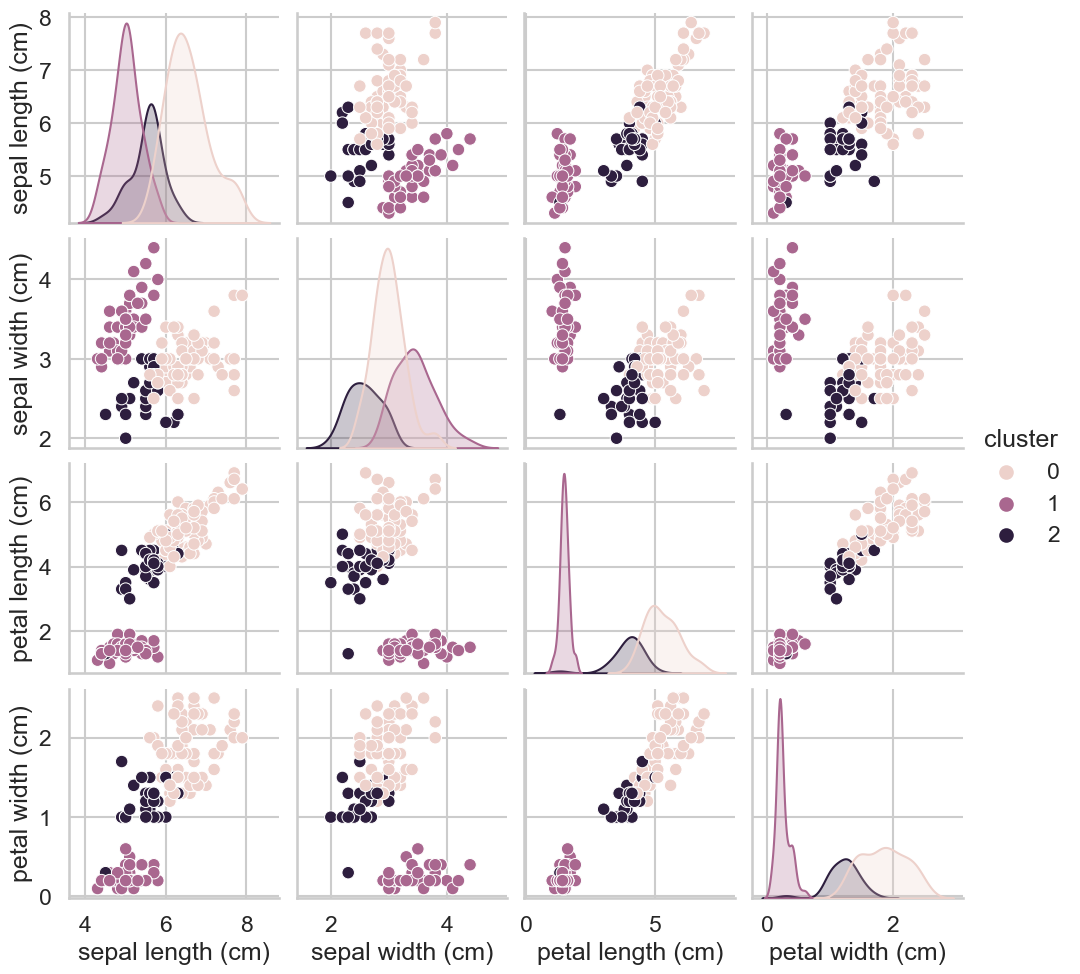

In [37]:
# Perform agglomerative clustering with n_clusters=3
agglomerative = AgglomerativeClustering(n_clusters=3)
agglomerative.fit(iris_scaled_df)

# Add the cluster labels to the DataFrame
iris_df['cluster'] = agglomerative.labels_

# Visualize the dataset using pairplot with cluster labels
sns.pairplot(data=iris_df, hue='cluster')

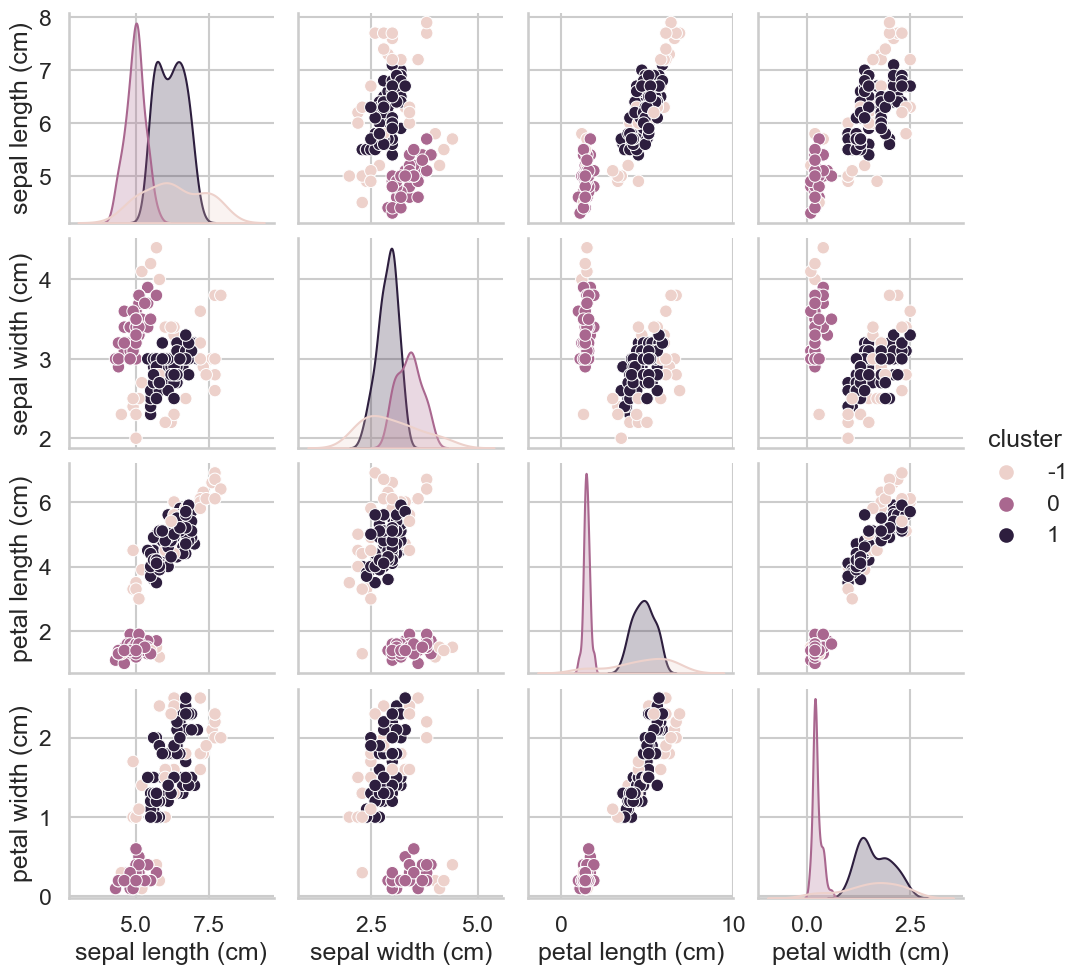

In [38]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(iris_scaled_df)

# Add the cluster labels to the DataFrame
iris_df['cluster'] = dbscan.labels_

# Visualize the dataset using pairplot with cluster labels
sns.pairplot(data=iris_df, hue='cluster')

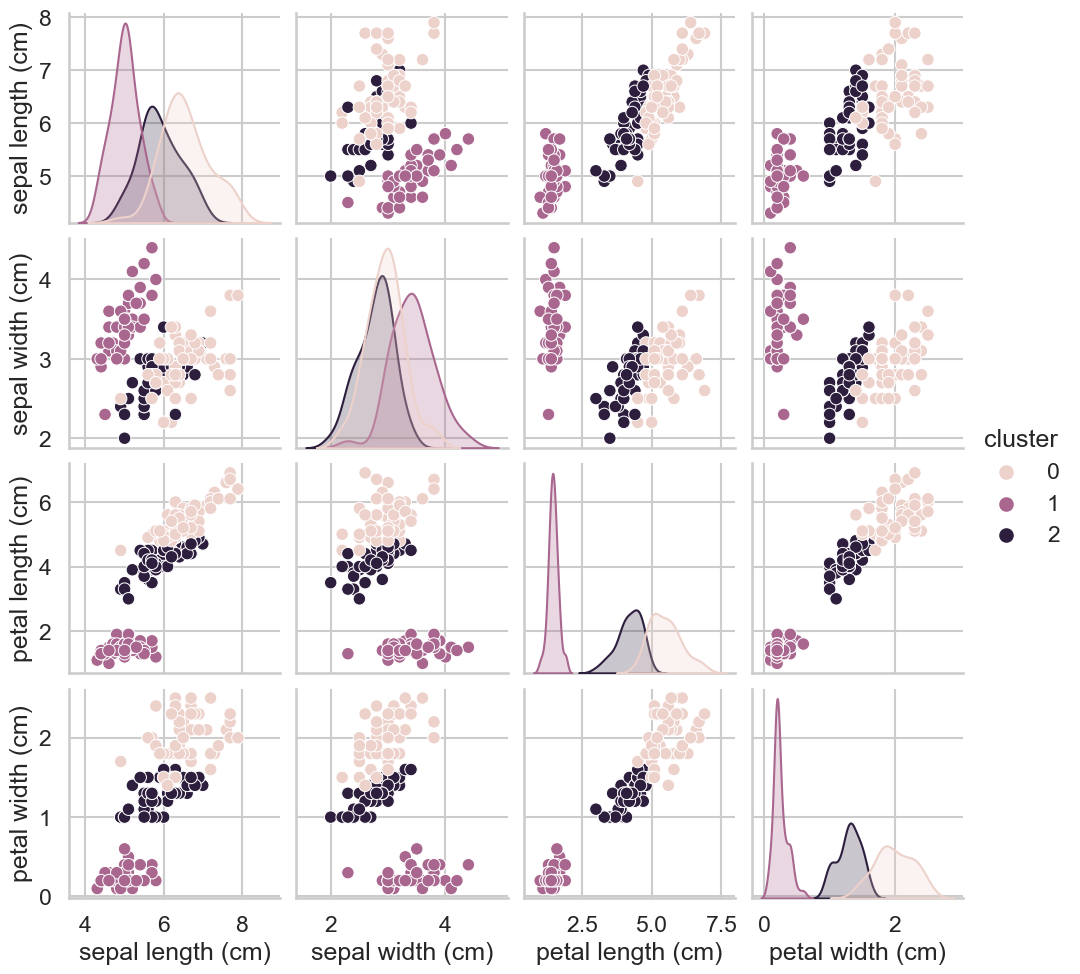

In [39]:
# Perform Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=3)
gmm.fit(iris_scaled_df)

# Add the cluster labels to the DataFrame
iris_df['cluster'] = gmm.predict(iris_scaled_df)

# Visualize the dataset using pairplot with cluster labels
sns.pairplot(data=iris_df, hue='cluster')

## Customer dataset
Repeat all the above on the customer data set 

### Scaling
Scaling using standard scaler and visualizing the data on a pairplot

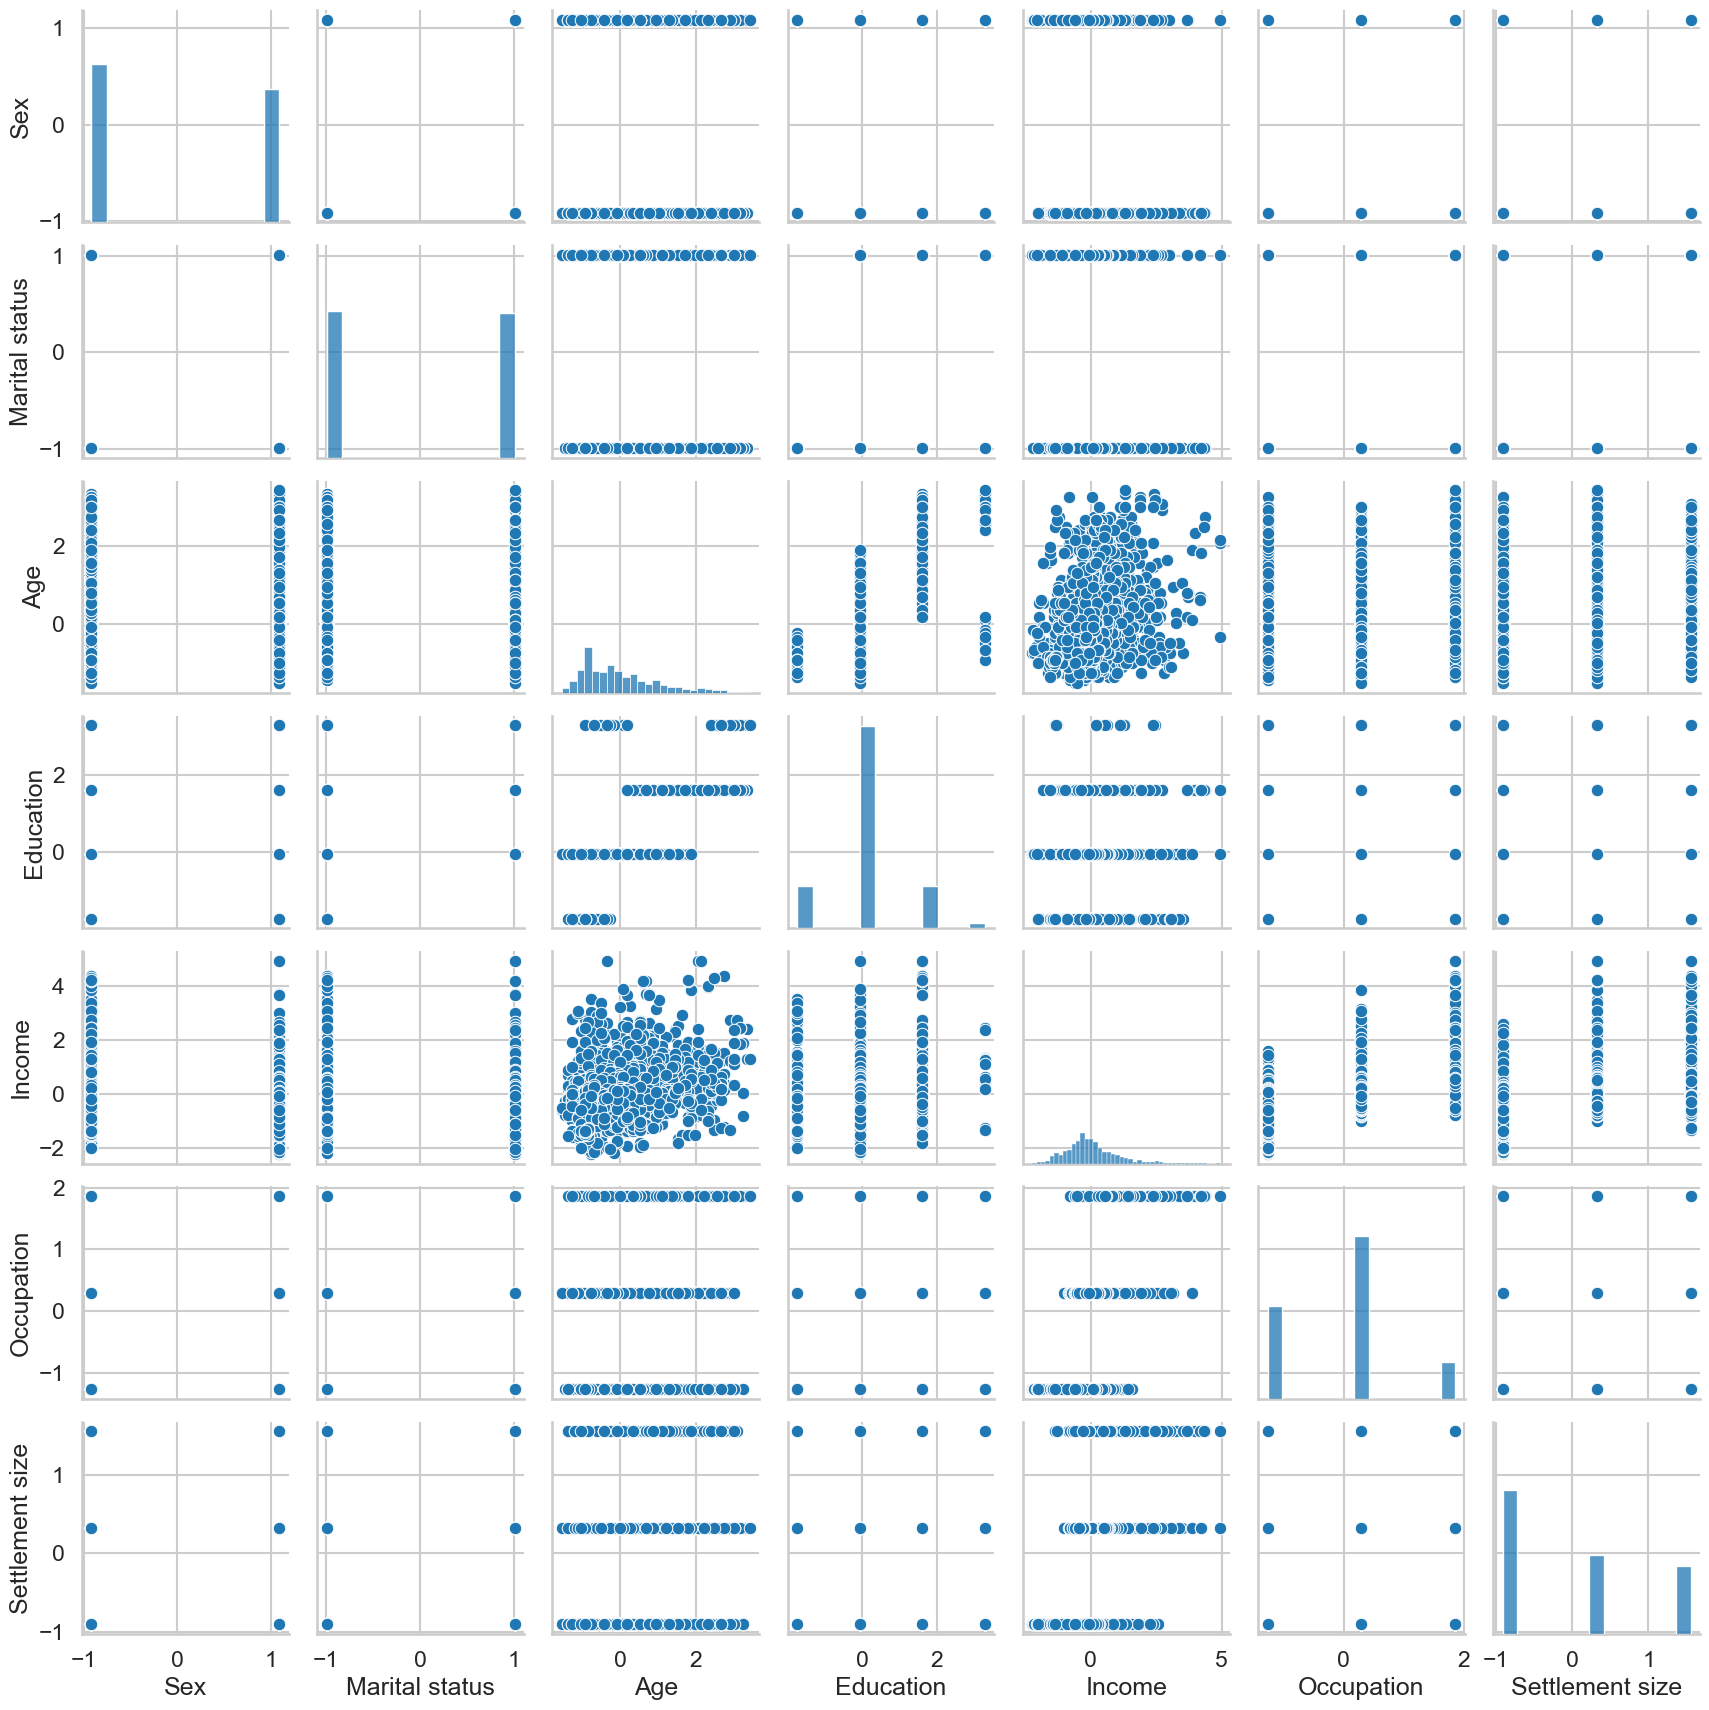

In [42]:
# Load the customer data into a pandas DataFrame
customers = pd.read_csv("cust_data.csv", index_col="ID")

# Select the features to be scaled
features_to_scale = ["Sex", "Marital status", "Age", "Education", "Income", "Occupation", "Settlement size"]
data_to_scale = customers[features_to_scale]

# Scale the data using StandardScaler
scaler = prep.StandardScaler()
data_scaled = scaler.fit_transform(data_to_scale)

# Store the scaled data in a new DataFrame
customers_scaled = pd.DataFrame(data_scaled, index=customers.index, columns=features_to_scale)

sns.pairplot(data=customers_scaled)



In [45]:
from sklearn.decomposition import PCA

# Create the PCA object and set the percentage of variance to retain
pca = PCA(n_components=0.8)

# Fit the PCA model to the scaled data
pca.fit(customers_scaled)

# Transform the scaled data into the new coordinate system defined by the principal components
customers_transformed = pca.transform(customers_scaled)

# Convert the transformed data back into a DataFrame
customers_transformed_df = pd.DataFrame(customers_transformed, columns=['PC1', 'PC2','PC3'])

# Print the explained variance ratio
print('Explained variance ratio:', pca.explained_variance_ratio_)

# Print the transformed DataFrame
print('Transformed DataFrame:\n', customers_transformed_df.head())

Explained variance ratio: [0.35696328 0.26250923 0.18821114]
Transformed DataFrame:
         PC1       PC2       PC3
0  2.514746  0.834122  2.174806
1  0.344935  0.598146 -2.211603
2 -0.651063 -0.680093  2.280419
3  1.714316 -0.579927  0.730731
4  1.626745 -0.440496  1.244909


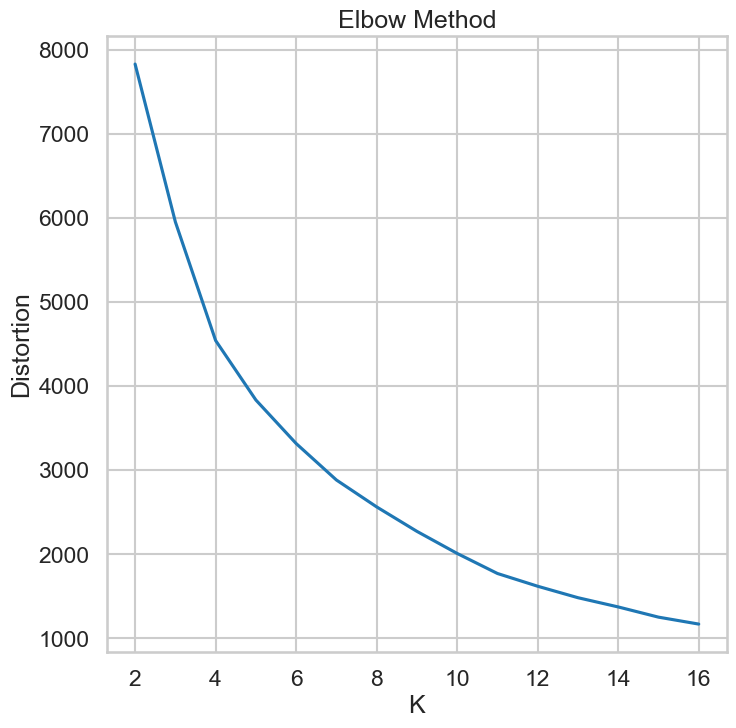

In [46]:
distortions = []
for i in range(2, 17):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(customers_transformed_df)
    distortions.append(kmeans.inertia_)

plt.plot(range(2, 17), distortions)
plt.title('Elbow Method')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.show()

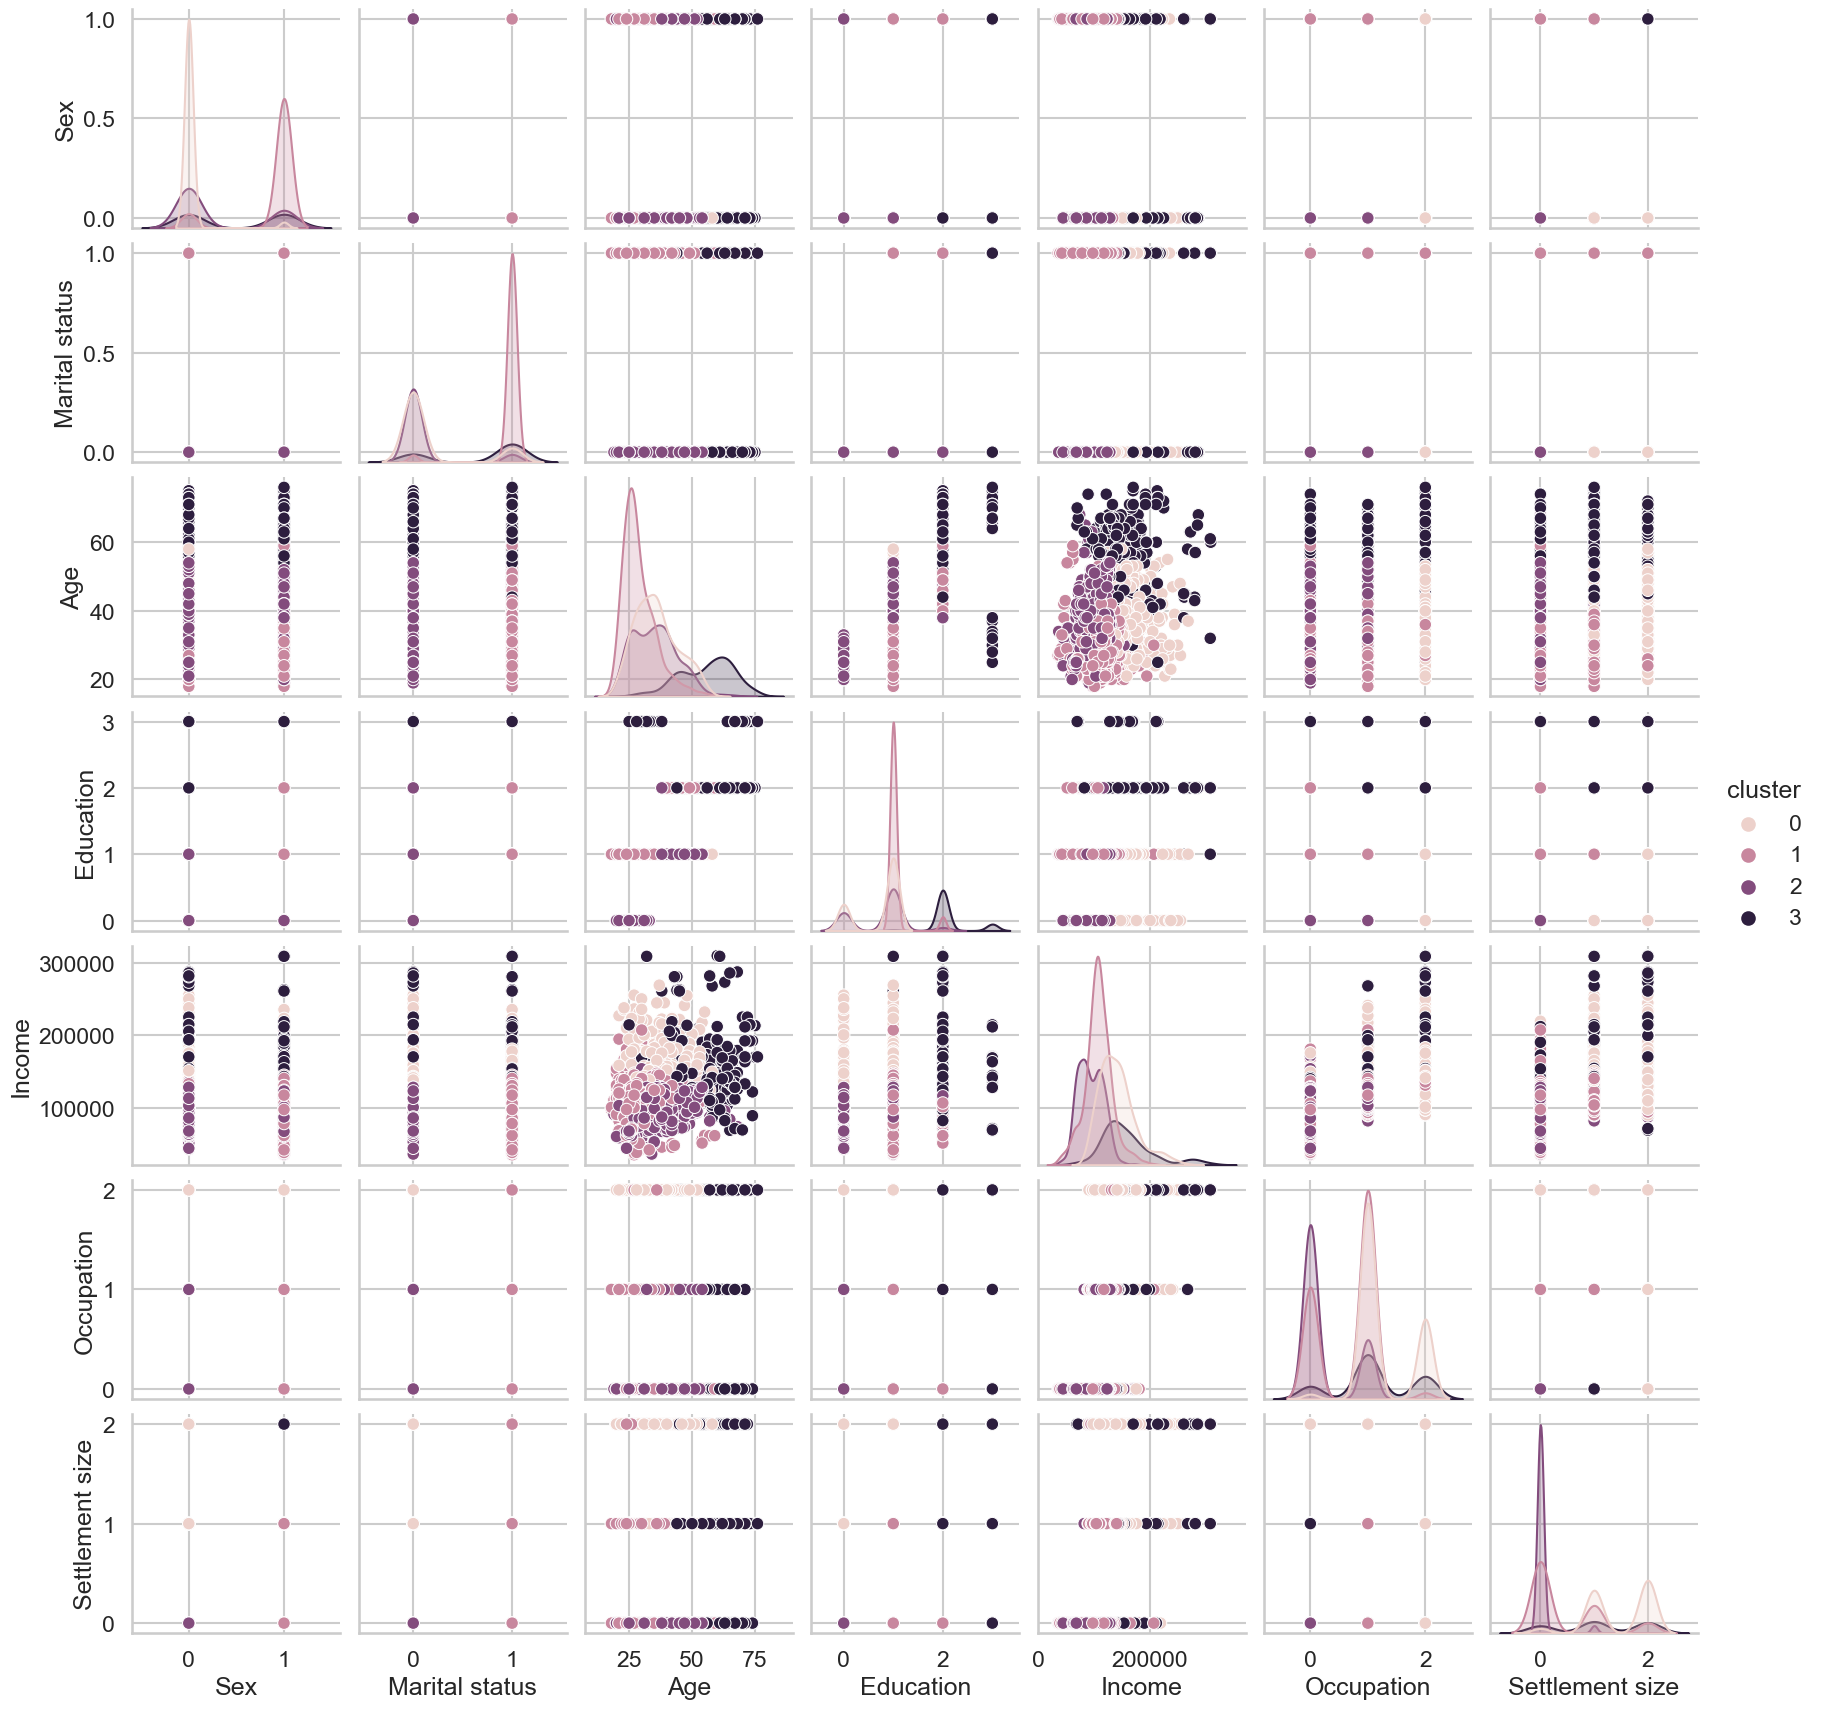

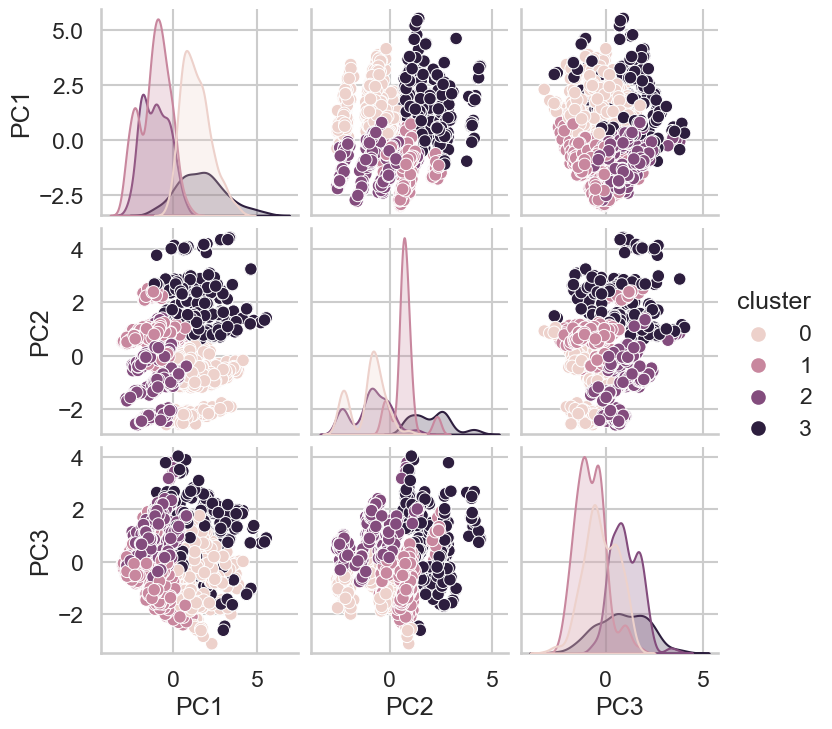

In [50]:
# Perform k-means clustering with k=4
kmeans = KMeans(n_clusters=4)
kmeans.fit(customers_transformed_df)

# Add the cluster labels to the DataFrame
customers['cluster'] = kmeans.labels_

# Visualize the dataset using pairplot with cluster labels
sns.pairplot(data=customers, hue='cluster')

customers_transformed_df['cluster'] = kmeans.labels_
sns.pairplot(data=customers_transformed_df, hue='cluster')

In [53]:
max_sil_cust_agg=[0,"","",0.0]
for aff in ["euclidean","manhattan","cosine"]:
    for link in ["average","single"]:
        for thresh in range(1,100):
            thr=thresh/10
            hierarchical = AgglomerativeClustering(affinity=aff,linkage=link,distance_threshold=thr,n_clusters=None).fit(customers_transformed_df)
            if(2<np.max(hierarchical.labels_)+1<8):
                sil = silhouette_score(customers_transformed_df,labels=hierarchical.labels_)
                if(sil>max_sil_cust_agg[0]):
                     max_sil_cust_agg=[sil,aff,link,thr]
print(max_sil_cust_agg)

[0.4210727728656562, 'manhattan', 'average', 5.1]


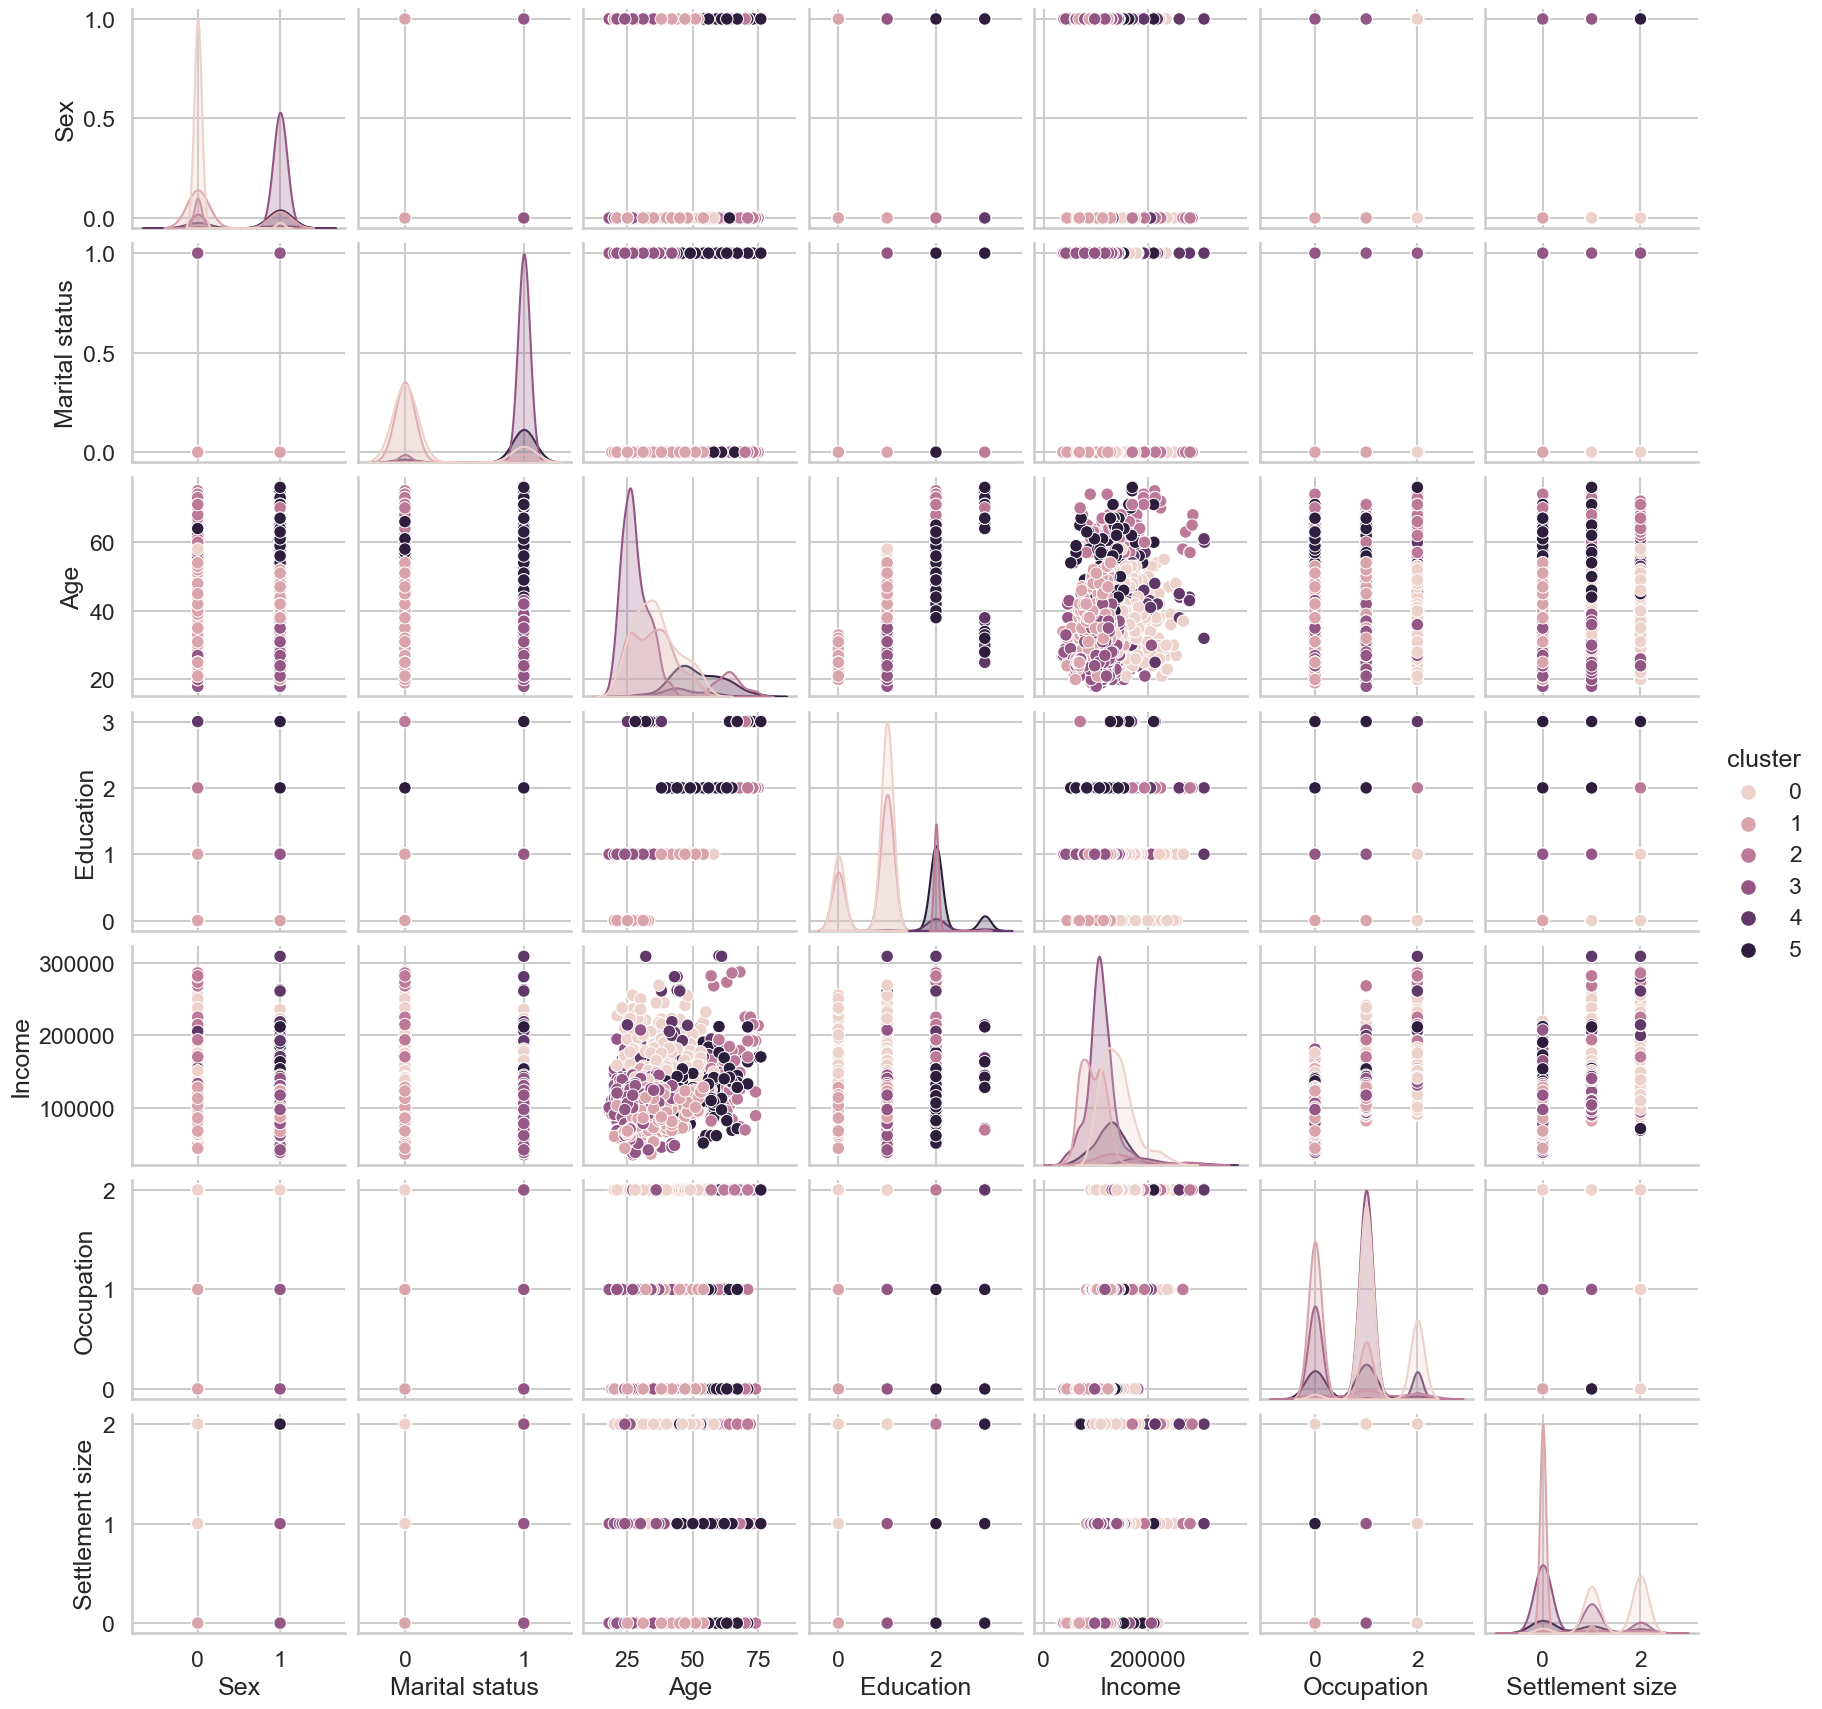

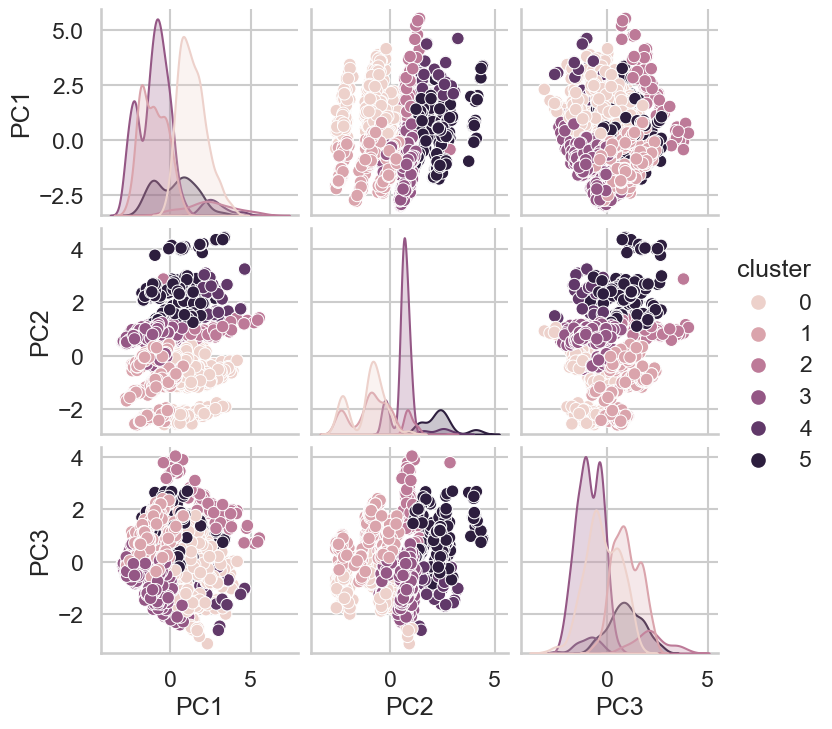

In [54]:
agglomerative = AgglomerativeClustering(affinity="manhattan",linkage="average",distance_threshold=5.1,n_clusters=None)
agglomerative.fit(customers_transformed_df)

# Add the cluster labels to the DataFrame
customers['cluster'] = agglomerative.labels_

# Visualize the dataset using pairplot with cluster labels
sns.pairplot(data=customers, hue='cluster')

customers_transformed_df['cluster'] = agglomerative.labels_
sns.pairplot(data=customers_transformed_df, hue='cluster')

In [56]:
# max_sil4 = [0.0,0.0,0]
max_sil_cust_db = [0.0,0.0,0,0]

myx=[]
myy=[]
myz=[]
myk=[]
for i in np.linspace(1,4,41):    
    for j in range(5,15):
        dbscan = DBSCAN(eps=i,min_samples=j).fit(customers_transformed_df)
        myK = np.max(dbscan.labels_)+1
        if(2<myK<10):
            sil = silhouette_score(customers_transformed_df,labels=dbscan.labels_)
            myx.append(i)
            myy.append(j)
            myz.append(sil)
            myk.append(myK)
            if(sil>max_sil_cust_db[0]):
                max_sil_cust_db=[sil,i,j,myK]

print('Maximum silhouette score is',max_sil_cust_db[0],'\nEPS = ',max_sil_cust_db[1],'\nMin_samples = ',max_sil_cust_db[2],'\nK = ',max_sil_cust_db[3],'\n')
# print('Maximum silhouette score with K=4 is',max_sil4[0],'\nEPS=',max_sil4[1],'\nMin_samples=',max_sil4[2])

myeps=np.array(myx)
mymin=np.array(myy)
mysil=np.array(myz)
myk=np.array(myk)  

Maximum silhouette score is 0.4271836777386786 
EPS =  1.375 
Min_samples =  5 
K =  4 



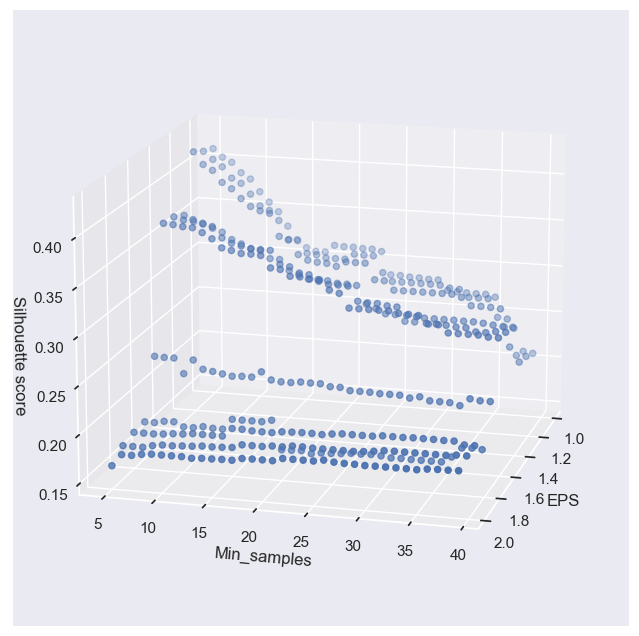

In [276]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# for i in (np.unique(myk)):
#     ax.scatter(myeps[myk==i],mymin[myk==i],mysil[myk==i],c=((i-2)/len(np.unique(myk)),(i-2)/len(np.unique(myk)),1))
ax.scatter(myeps,mymin,mysil)
ax.view_init(elev=15, azim=15)
ax.set_xlabel('EPS')
ax.set_ylabel('Min_samples')
ax.set_zlabel('Silhouette score')
plt.show()

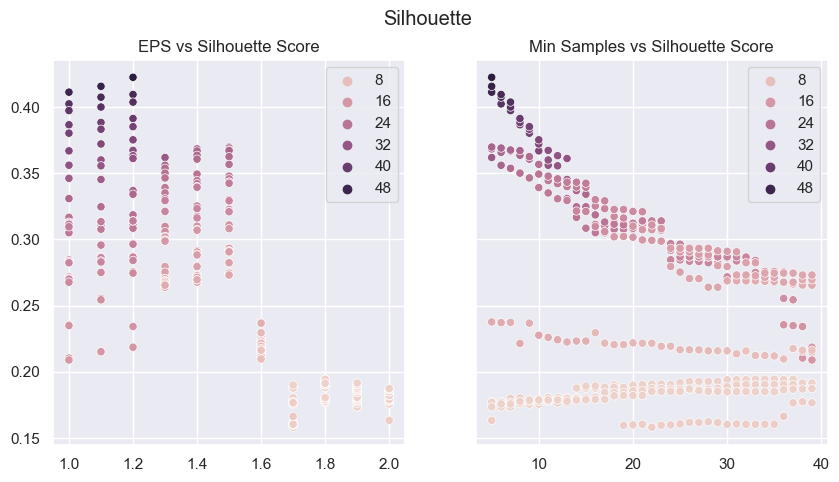

In [271]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
fig.suptitle('Silhouette')
#eps vs silhouette
sns.scatterplot(ax=axes[0], x=myeps, y=mysil, hue=myk)
axes[0].set_title('EPS vs Silhouette Score')
#min_samples vs silhouette
sns.scatterplot(ax=axes[1], x=mymin, y=mysil, hue=myk)
axes[1].set_title('Min Samples vs Silhouette Score')
fig.show()

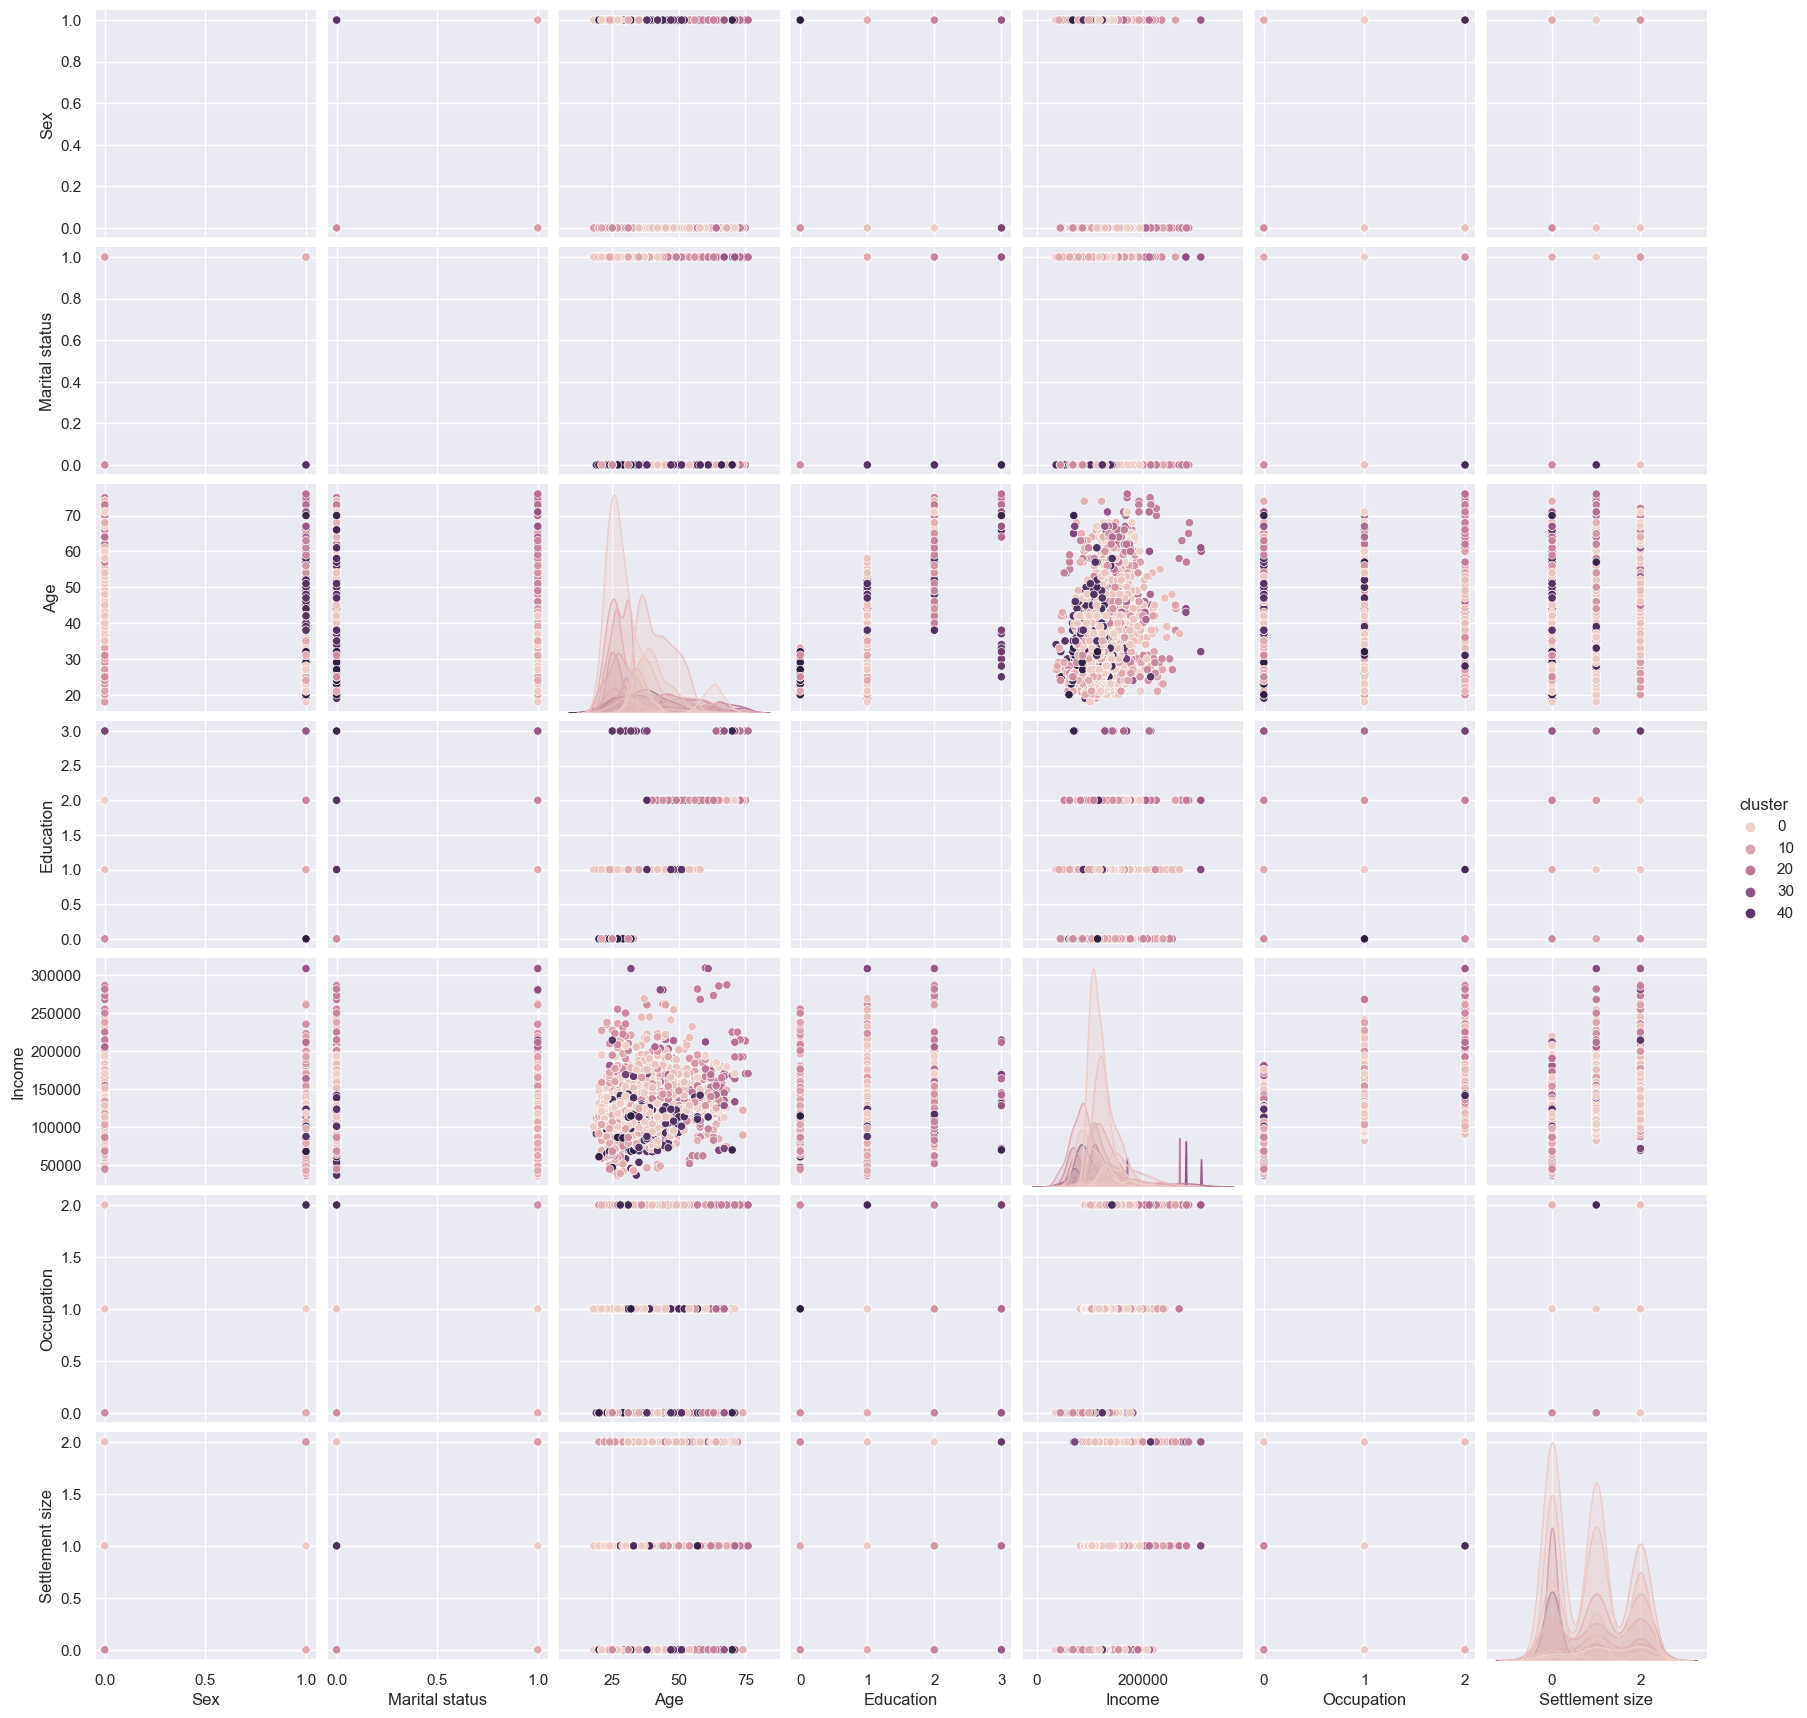

In [277]:
dbscan = DBSCAN(eps=1.5, min_samples=0.28)
dbscan.fit(customers_scaled)

# Add the cluster labels to the DataFrame
customers['cluster'] = dbscan.labels_

# Visualize the dataset using pairplot with cluster labels
sns.pairplot(data=customers, hue='cluster')

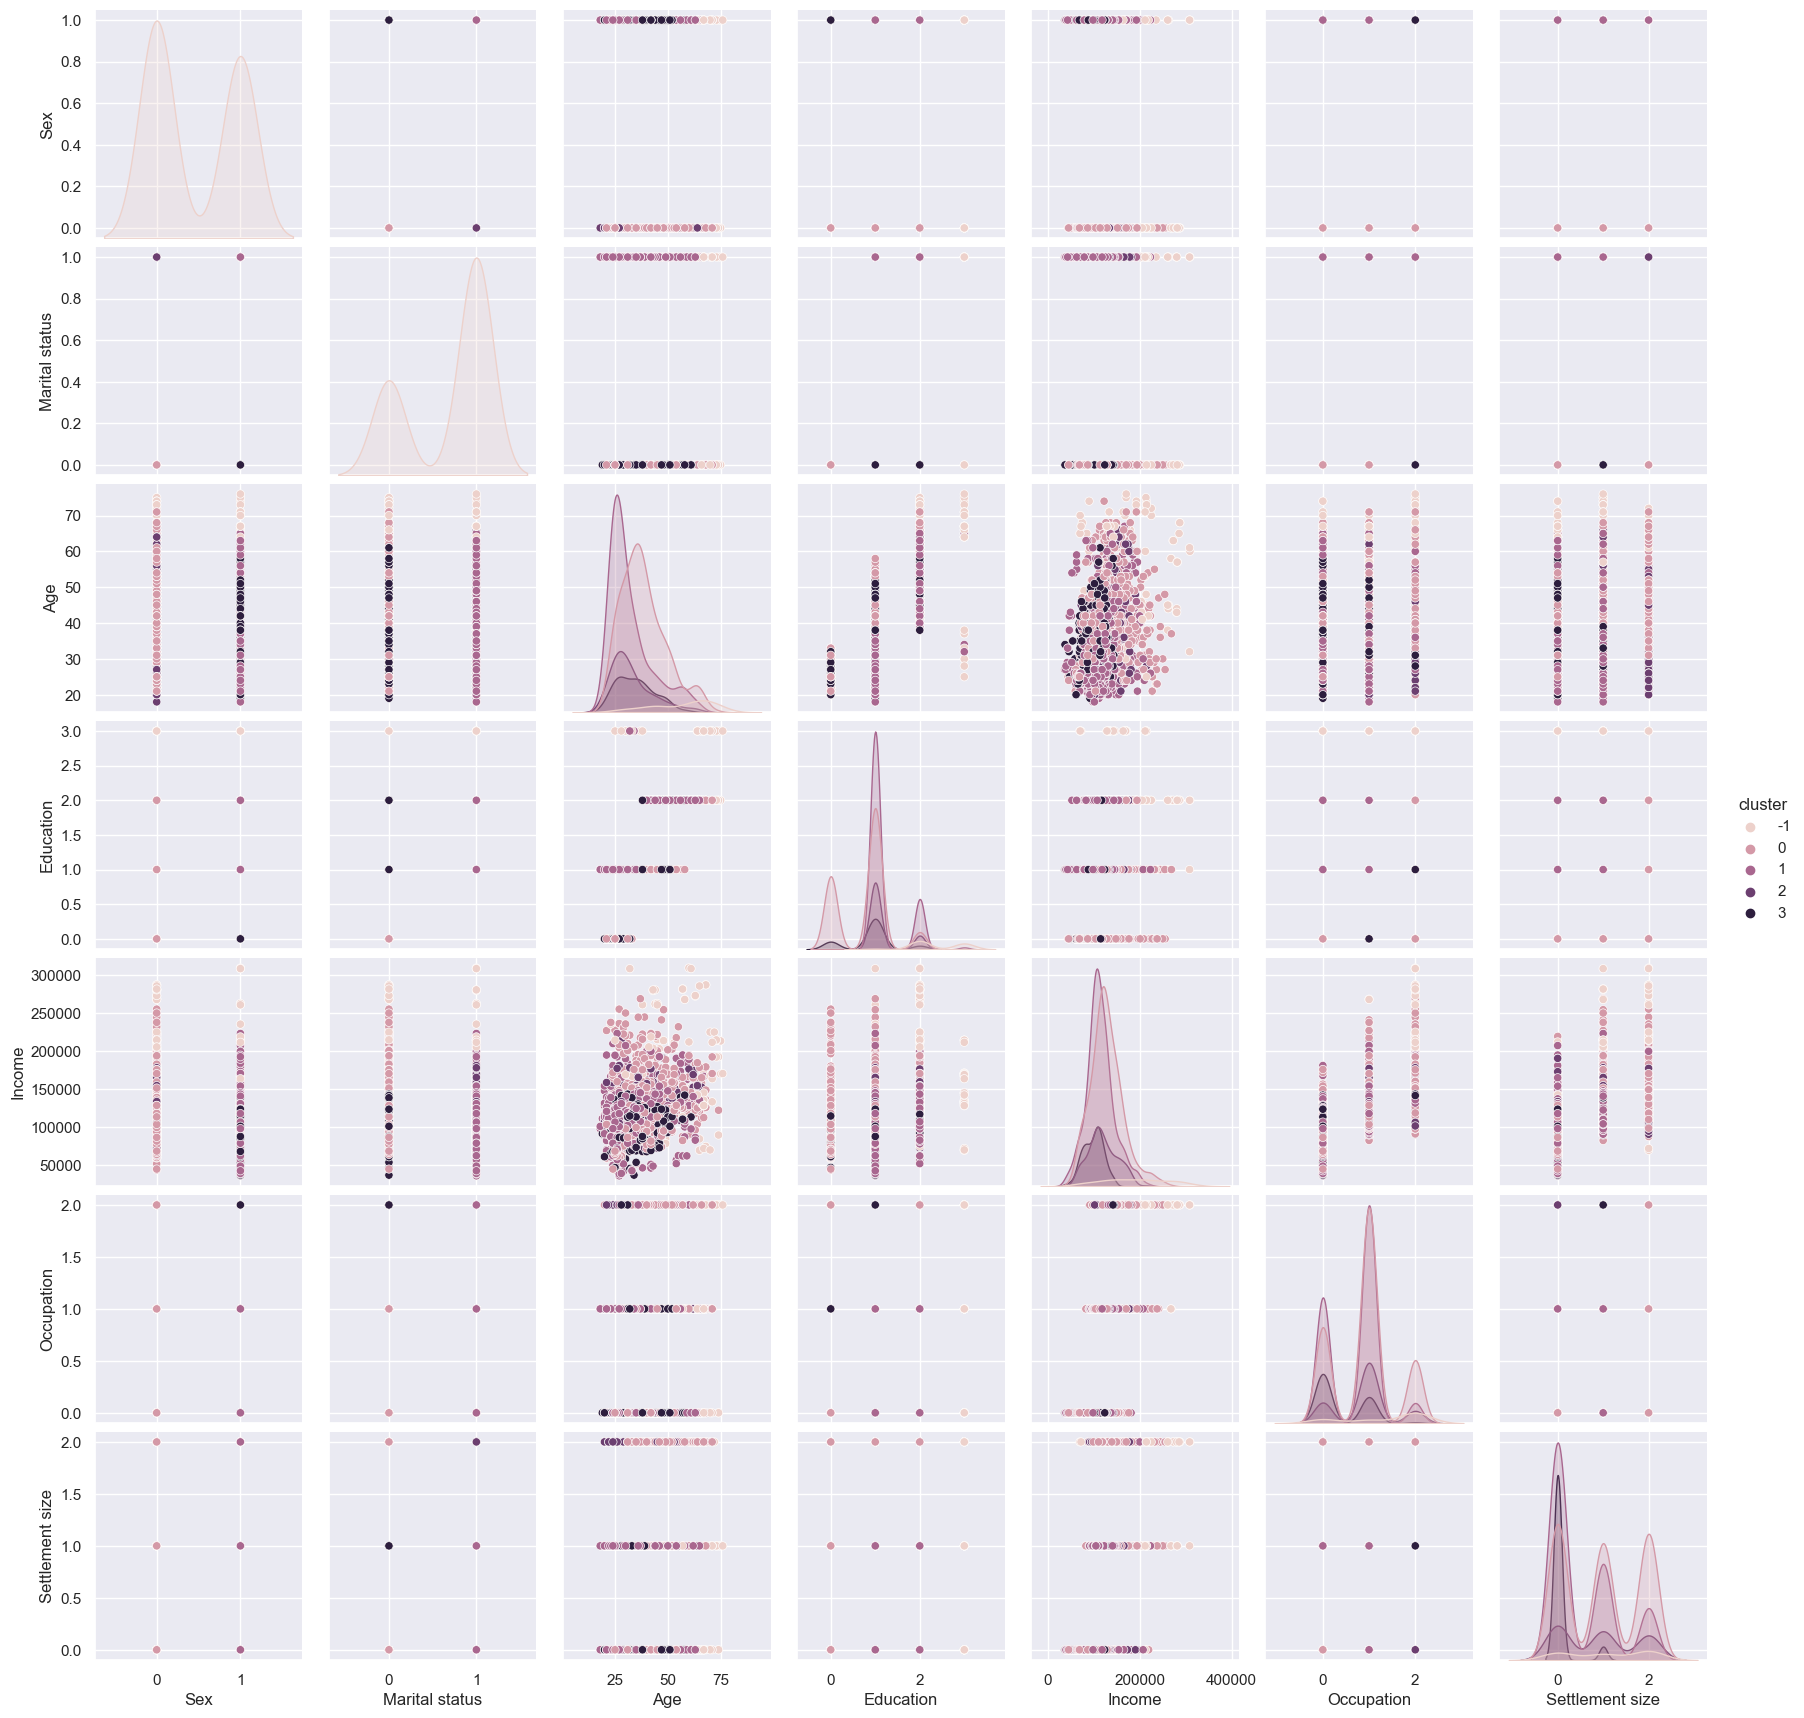

In [218]:
dbscan = DBSCAN(eps=1.75, min_samples=24)
dbscan.fit(customers_scaled)

# Add the cluster labels to the DataFrame
customers['cluster'] = dbscan.labels_

# Visualize the dataset using pairplot with cluster labels
sns.pairplot(data=customers, hue='cluster')

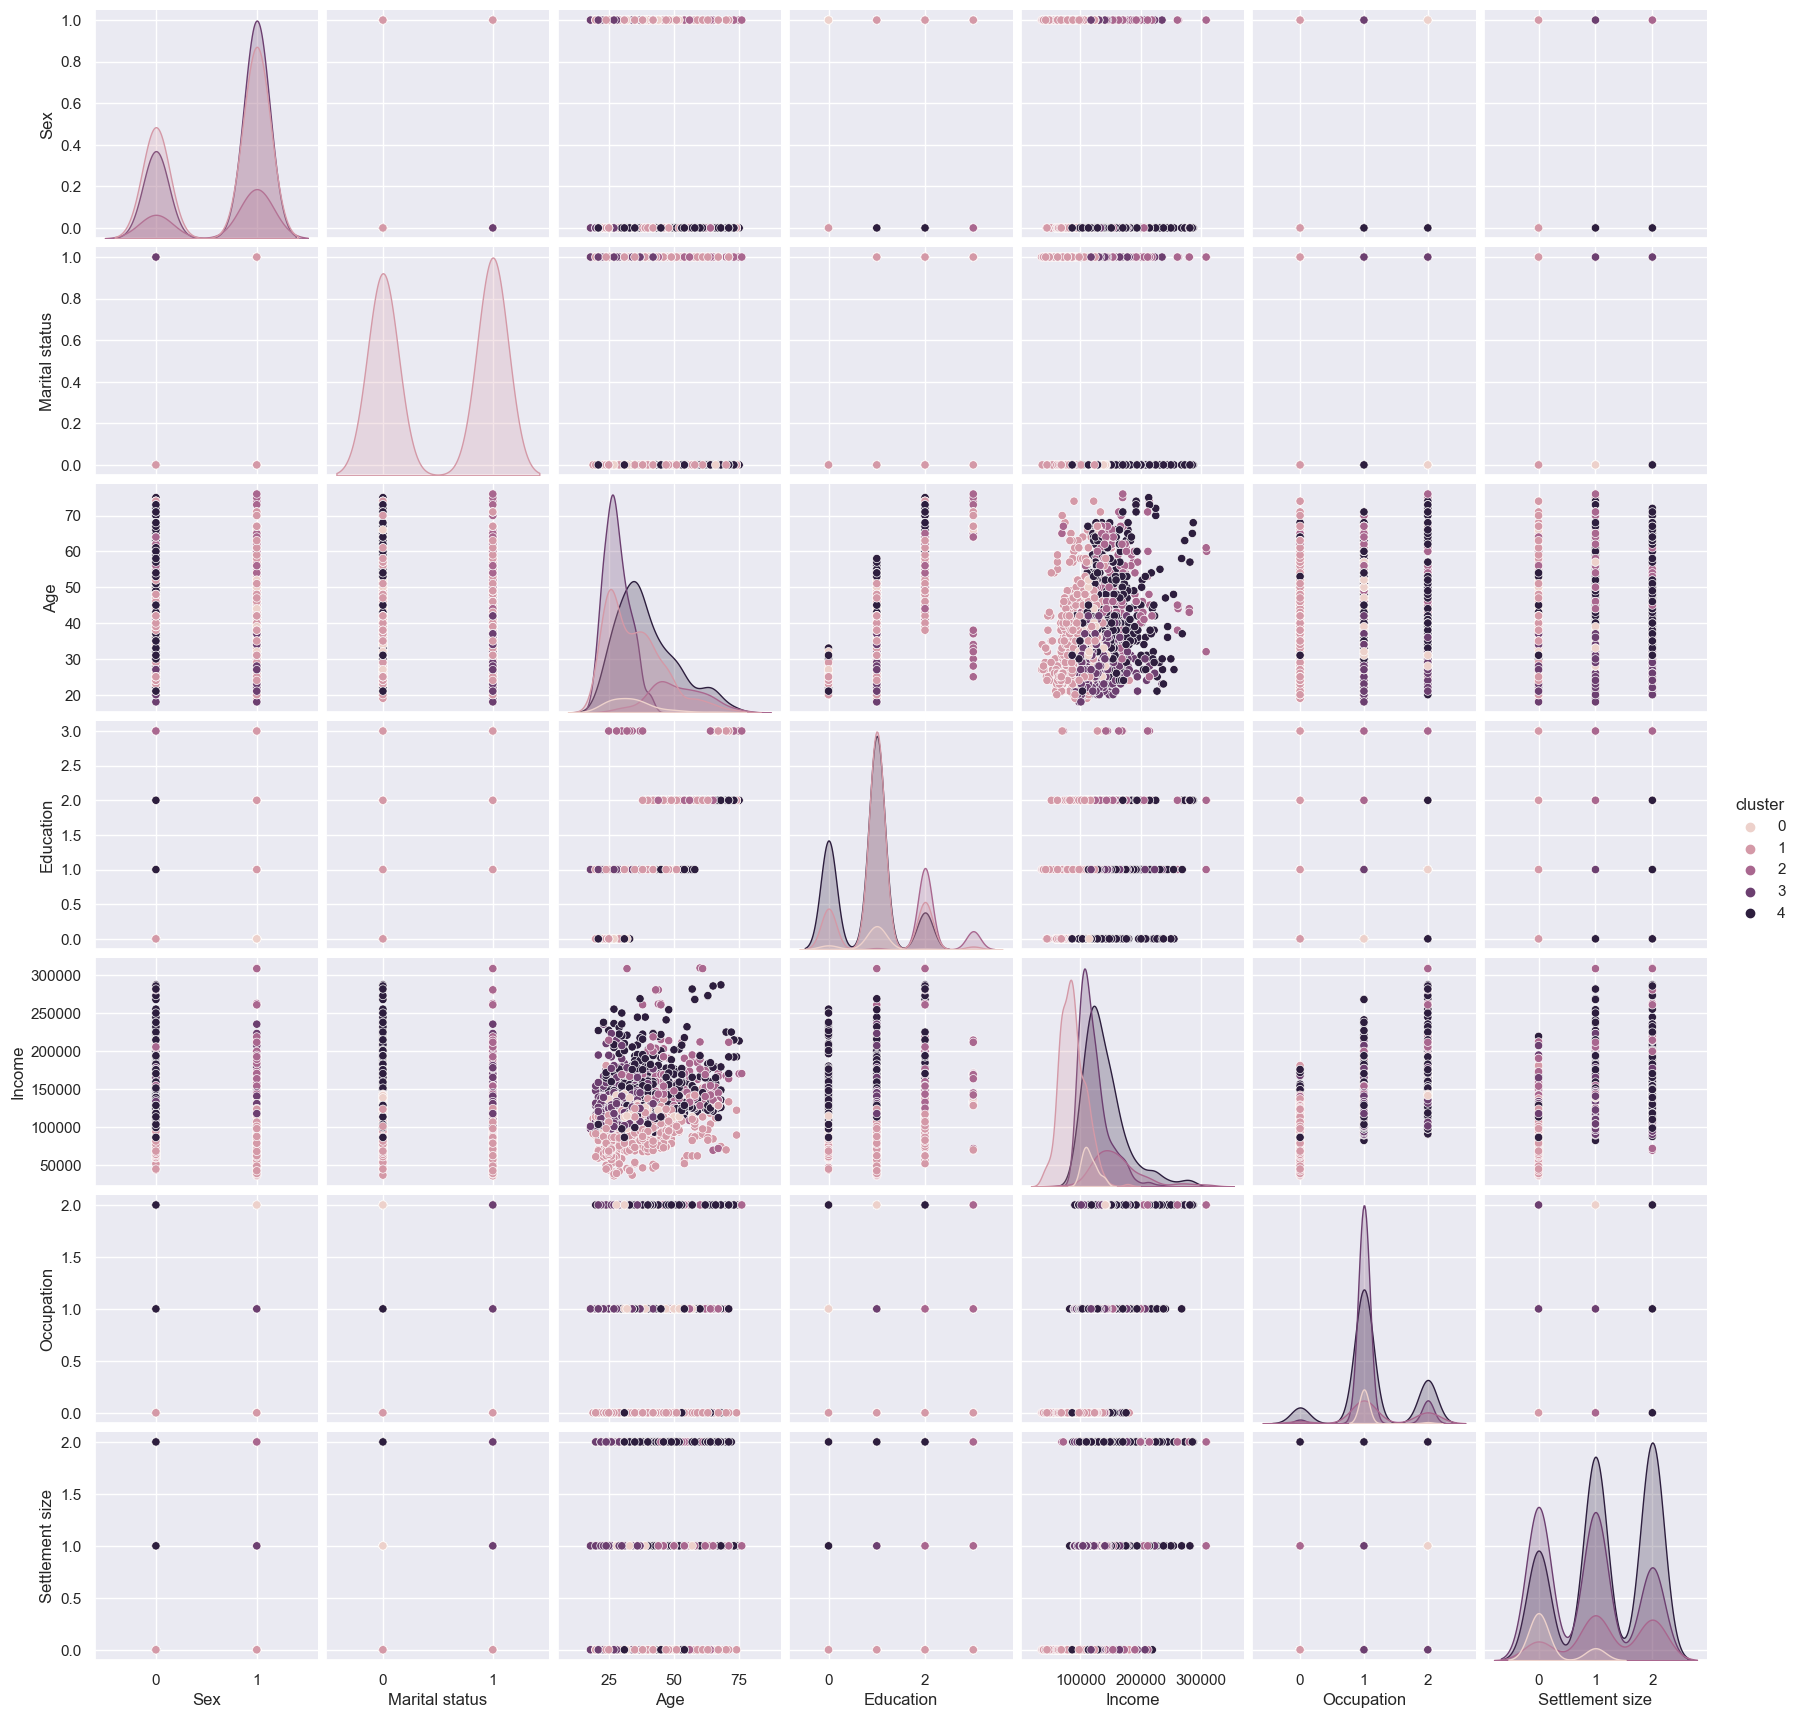

In [279]:
# Perform Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=5)
gmm.fit(customers_scaled)

# Add the cluster labels to the DataFrame
customers['cluster'] = gmm.predict(customers_scaled)

# Visualize the dataset using pairplot with cluster labels
sns.pairplot(data=customers, hue='cluster')